# Assess association with clinical outcomes and visualize results

We define the cancer reactive status of the cells in this study using the results learned from joint analysis

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
cell_data_CD8 = pd.read_csv("cell_meta_data_CD8_cleaned.csv", index_col=0)
cell_data_CD8.rename(columns={"Treatment": "TimePoint"}, inplace=True)
cell_data_CD8


,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,orig.ident,nCount_RNA,nFeature_RNA,Ident,Patient,TimePoint,Tissue,MajorCellType,SubCellType,cluster,CD4_score,CD8_score,cell_type_by_cluster,cell_type_true_label,highlight,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
CRC01-B-III_AAATGCCGTCATGCCG,1462,7.288244,4649,8.444622,42.030544,55.689396,66.465907,79.307378,SeuratProject,4649,1462,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,-0.300942,1.548291,CD8,CD8,Other,0.401399,0.093138,-0.083426,0.194614,0.278018,2.587560,0.135383,-0.158219,0.432557,False,3,False,False,AAATGCCGTCATGCCG-1,TRAV19_TGTGCTCTGGCCCTCGCTCAGGGAGCCCAGAAGCTGGTA...,CALALAQGAQKLVF,TGTGCTCTGGCCCTCGCTCAGGGAGCCCAGAAGCTGGTATTT,TRAV19,TRAJ54,1292.0,5.0,565.0,True,TRBV4-1_TGCGCCAGCAGCCGTCTGGCACAGTCCGCCTACAATGA...,CASSRLAQSAYNEQFF,TGCGCCAGCAGCCGTCTGGCACAGTCCGCCTACAATGAGCAGTTCTTC,TRBV4-1,TRBJ2-1,8294.0,20.0,484.0,True
CRC01-B-III_AACTGGTAGTGTACGG,1407,7.249926,5304,8.576405,47.680995,62.537707,71.851433,82.899698,SeuratProject,5304,1407,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,-0.213676,1.489181,CD8,CD8,Other,0.445174,0.084258,-0.189062,0.100224,0.254337,2.523680,0.215469,-0.461138,0.788160,False,3,False,False,AACTGGTAGTGTACGG-1,TRAV27_TGTGCAGGAGCTCGGGGTGCTACAAACAAGCTCATCTTT...,CAGARGATNKLIF,TGTGCAGGAGCTCGGGGTGCTACAAACAAGCTCATCTTT,TRAV27,TRAJ32,1210.0,3.0,527.0,True,TRBV9_TGTGCCAGCAGCGTAGGGGACAGCGTATCCTACGAGCAGT...,CASSVGDSVSYEQYF,TGTGCCAGCAGCGTAGGGGACAGCGTATCCTACGAGCAGTACTTC,TRBV9,TRBJ2-7,4630.0,13.0,499.0,True
CRC01-B-III_AAGCCGCGTCTTCGTC,1583,7.367709,4551,8.423322,38.716766,51.790815,62.052296,76.203032,SeuratProject,4551,1583,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,-0.310524,1.753091,CD8,CD8,Other,0.324212,0.114276,-0.170052,0.137503,0.261594,2.423045,0.345461,-0.541278,1.369193,False,3,False,False,AAGCCGCGTCTTCGTC-1,TRAV12-2_TGTGCCGTGAACATGGAGAAGGCTGGAGCCAATAGTA...,CAVNMEKAGANSKLTF,TGTGCCGTGAACATGGAGAAGGCTGGAGCCAATAGTAAGCTGACATTT,TRAV12-2,TRAJ56,2588.0,3.0,553.0,True,TRBV5-1_TGCGCCAGCAGCTTTAGTCAGGGTCCTAAAAACATTCA...,CASSFSQGPKNIQYF,TGCGCCAGCAGCTTTAGTCAGGGTCCTAAAAACATTCAGTACTTC,TRBV5-1,TRBJ2-4,4458.0,8.0,483.0,True
CRC01-B-III_AAGGCAGCACCTATCC,1238,7.122060,3843,8.254269,45.225085,58.808223,68.878480,80.796253,SeuratProject,3843,1238,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,-0.127624,0.752251,CD8,CD8,Other,0.279379,0.140339,-0.191666,0.131955,0.298932,2.574995,0.194049,-0.580200,0.735990,False,3,False,False,AAGGCAGCACCTATCC-1,TRAV12-2_TGTGCCCTCGGGACTGGAGGCTTCAAAACTATCTTT_...,CALGTGGFKTIF,TGTGCCCTCGGGACTGGAGGCTTCAAAACTATCTTT,TRAV12-2,TRAJ9,1920.0,7.0,541.0,True,TRBV6-6_TGTGCCAGCAGTCACCGGGATCTCACCGGGGAGCTGTT...,CASSHRDLTGELFF,TGTGCCAGCAGTCACCGGGATCTCACCGGGGAGCTGTTTTTT,TRBV6-6,TRBJ2-2,4484.0,12.0,495.0,True
CRC01-B-III_ACCCACTAGTTAGGTA,1995,7.598900,6428,8.768574,39.701307,53.671437,63.518979,74.953329,SeuratProject,6428,1995,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,0.361993,0.599373,CD8,CD8,Other,0.381708,0.023125,-0.284976,0.161019,0.206579,2.198593,0.345817,-0.858354,1.089569,False,3,False,False,ACCCACTAGTTAGGTA-1,TRAV13-2_TGTGCAGAGAATAACCAGGGAGGAAAGCTTATCTTC_...,CAENNQGGKLIF,TGTGCAGAGAATAACCAGGGAGGAAAGCTTATCTTC,TRAV13-2,TRAJ23,1092.0,4.0,506.0,True,TRBV15_TGTGCCACCAGCAGAGATGAGGTAGCGGGAGTGTACCAA...,CATSRDEVAGVYQETQYF,TGTGCCACCAGCAGAGATGAGGTAGCGGGAGTGTACCAAGAGACCC...,TRBV15,TRBJ2-5,3876.0,10.0,538.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [2]:
cell_data_CD8 = cell_data_CD8[
    (cell_data_CD8['Tissue'] != 'TN') &
    (cell_data_CD8['Tissue'] != 'LN')
]
cell_data_CD8.index = cell_data_CD8.index + "-Chen_2024"
cell_data_CD8



,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,orig.ident,nCount_RNA,nFeature_RNA,Ident,Patient,TimePoint,Tissue,MajorCellType,SubCellType,cluster,CD4_score,CD8_score,cell_type_by_cluster,cell_type_true_label,highlight,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
CRC01-B-III_AAATGCCGTCATGCCG-Chen_2024,1462,7.288244,4649,8.444622,42.030544,55.689396,66.465907,79.307378,SeuratProject,4649,1462,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,-0.300942,1.548291,CD8,CD8,Other,0.401399,0.093138,-0.083426,0.194614,0.278018,2.587560,0.135383,-0.158219,0.432557,False,3,False,False,AAATGCCGTCATGCCG-1,TRAV19_TGTGCTCTGGCCCTCGCTCAGGGAGCCCAGAAGCTGGTA...,CALALAQGAQKLVF,TGTGCTCTGGCCCTCGCTCAGGGAGCCCAGAAGCTGGTATTT,TRAV19,TRAJ54,1292.0,5.0,565.0,True,TRBV4-1_TGCGCCAGCAGCCGTCTGGCACAGTCCGCCTACAATGA...,CASSRLAQSAYNEQFF,TGCGCCAGCAGCCGTCTGGCACAGTCCGCCTACAATGAGCAGTTCTTC,TRBV4-1,TRBJ2-1,8294.0,20.0,484.0,True
CRC01-B-III_AACTGGTAGTGTACGG-Chen_2024,1407,7.249926,5304,8.576405,47.680995,62.537707,71.851433,82.899698,SeuratProject,5304,1407,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,-0.213676,1.489181,CD8,CD8,Other,0.445174,0.084258,-0.189062,0.100224,0.254337,2.523680,0.215469,-0.461138,0.788160,False,3,False,False,AACTGGTAGTGTACGG-1,TRAV27_TGTGCAGGAGCTCGGGGTGCTACAAACAAGCTCATCTTT...,CAGARGATNKLIF,TGTGCAGGAGCTCGGGGTGCTACAAACAAGCTCATCTTT,TRAV27,TRAJ32,1210.0,3.0,527.0,True,TRBV9_TGTGCCAGCAGCGTAGGGGACAGCGTATCCTACGAGCAGT...,CASSVGDSVSYEQYF,TGTGCCAGCAGCGTAGGGGACAGCGTATCCTACGAGCAGTACTTC,TRBV9,TRBJ2-7,4630.0,13.0,499.0,True
CRC01-B-III_AAGCCGCGTCTTCGTC-Chen_2024,1583,7.367709,4551,8.423322,38.716766,51.790815,62.052296,76.203032,SeuratProject,4551,1583,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,-0.310524,1.753091,CD8,CD8,Other,0.324212,0.114276,-0.170052,0.137503,0.261594,2.423045,0.345461,-0.541278,1.369193,False,3,False,False,AAGCCGCGTCTTCGTC-1,TRAV12-2_TGTGCCGTGAACATGGAGAAGGCTGGAGCCAATAGTA...,CAVNMEKAGANSKLTF,TGTGCCGTGAACATGGAGAAGGCTGGAGCCAATAGTAAGCTGACATTT,TRAV12-2,TRAJ56,2588.0,3.0,553.0,True,TRBV5-1_TGCGCCAGCAGCTTTAGTCAGGGTCCTAAAAACATTCA...,CASSFSQGPKNIQYF,TGCGCCAGCAGCTTTAGTCAGGGTCCTAAAAACATTCAGTACTTC,TRBV5-1,TRBJ2-4,4458.0,8.0,483.0,True
CRC01-B-III_AAGGCAGCACCTATCC-Chen_2024,1238,7.122060,3843,8.254269,45.225085,58.808223,68.878480,80.796253,SeuratProject,3843,1238,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,-0.127624,0.752251,CD8,CD8,Other,0.279379,0.140339,-0.191666,0.131955,0.298932,2.574995,0.194049,-0.580200,0.735990,False,3,False,False,AAGGCAGCACCTATCC-1,TRAV12-2_TGTGCCCTCGGGACTGGAGGCTTCAAAACTATCTTT_...,CALGTGGFKTIF,TGTGCCCTCGGGACTGGAGGCTTCAAAACTATCTTT,TRAV12-2,TRAJ9,1920.0,7.0,541.0,True,TRBV6-6_TGTGCCAGCAGTCACCGGGATCTCACCGGGGAGCTGTT...,CASSHRDLTGELFF,TGTGCCAGCAGTCACCGGGATCTCACCGGGGAGCTGTTTTTT,TRBV6-6,TRBJ2-2,4484.0,12.0,495.0,True
CRC01-B-III_ACCCACTAGTTAGGTA-Chen_2024,1995,7.598900,6428,8.768574,39.701307,53.671437,63.518979,74.953329,SeuratProject,6428,1995,8,P01,III,Blood,T,c15_CD8_Tn_CCR7,3,0.361993,0.599373,CD8,CD8,Other,0.381708,0.023125,-0.284976,0.161019,0.206579,2.198593,0.345817,-0.858354,1.089569,False,3,False,False,ACCCACTAGTTAGGTA-1,TRAV13-2_TGTGCAGAGAATAACCAGGGAGGAAAGCTTATCTTC_...,CAENNQGGKLIF,TGTGCAGAGAATAACCAGGGAGGAAAGCTTATCTTC,TRAV13-2,TRAJ23,1092.0,4.0,506.0,True,TRBV15_TGTGCCACCAGCAGAGATGAGGTAGCGGGAGTGTACCAA...,CATSRDEVAGVYQETQYF,TGTGCCACCAGCAGAGATGAGGTAGCGGGAGTGTACCAAGAGACCC...,TRBV15,TRBJ2-5,3876.0,10.0,538.0,True
...,...,...,...,...,...

In [3]:
# Read in final annotation of cancer reactive T cells
CD8_CR = pd.read_csv("../data/CD8_CAT_final.tsv", sep='\t', index_col=0)
CD8_CR


,n_genes_by_counts,total_counts,TRB_cdr3,TRB_v_gene,TRA_cdr3,TRA_v_gene,clone,cell_id,study,cancer_type,Patient,Sample,Treatment,Tissue,pos_score_CD8,neg_score_CD8,total_cells_patient,clone_number_per_patient,clone_number_total,clone_n_patient,clone_number_per_patient_median,clone_freq_per_patient,label,Prediction,TCR_asso_mutation
cell_study_id,,,,,,,,,,,,,,,,,,,,,,,,,
P69-CGTGAGCCAAGTTAAG-1-Liu_2025,1264,2499,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-CGTGAGCCAAGTTAAG-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,0.507239,-1.260841,934,15,15,1,15.0,0.016060,1,0.891415,neither
P69-ACGTCAAGTACCGCTG-1-Liu_2025,1127,1956,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-ACGTCAAGTACCGCTG-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,0.442703,-1.590498,934,15,15,1,15.0,0.016060,1,0.935627,neither
P69-CGACTTCCAGTTAACC-1-Liu_2025,1154,2074,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-CGACTTCCAGTTAACC-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,0.451032,-1.194513,934,15,15,1,15.0,0.016060,1,0.967659,neither
P69-AGATTGCTCCCTTGCA-1-Liu_2025,1646,4329,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-AGATTGCTCCCTTGCA-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,1.145237,-0.406391,934,15,15,1,15.0,0.016060,1,0.998405,neither
P69-CACACAAAGAGATGAG-1-Liu_2025,1460,3095,CAAGDRNNEKLFF,TRBV11-1,CAPGGTSYGKLTF,TRAV13-1,TRAV13-1_CAPGGTSYGKLTF_TRBV11-1_CAAGDRNNEKLFF,P69-CACACAAAGAGATGAG-1,Liu_2025,NSCLC,Liu2025_P69,P69,anti-PD-1,Tumor,1.083817,-0.870349,934,15,15,1,15.0,0.016060,1,0.991572,neither
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCACAAGAGCGTTTAC-1_PEM16C5-Chow_2023,1516,4285,CVFLAGNTGELFF,TRBV5-4,CAVMEYGNKLVF,TRAV12-2,TRAV12-2_CAVMEYGNKLVF_TRBV5-4_CVFLAGNTGELFF,TCACAAGAGCGTTTAC-1_PEM16C5,Chow_2023,EC,Chow2023_PEM16C5,GSM6514187,anti-PD-1,Blood,0.037398,-0.468253,633,69,162,2,81.0,0.109005,1,0.992127,alpha
TCAGGATAGAAGAAGC-1_PEM16C5-Chow_2023,1113,2842,CVFLAGNTGELFF,TRBV5-4,CAVMEYGNKLVF,TRAV12-2,TRAV12-2_CAVMEYGNKLVF_TRBV5-4_CVFLAGNTGELFF,TCAGGATAGAAGAAGC-1_PEM16C5,Chow_2023,EC,Chow2023_PEM16C5,GSM6514187,anti-PD-1,Blood,0.096793,-0.421434,633,69,162,2,81.0,0.109005,1,0.993784,alpha
TCGAGGCAGACTAAGT-1_PEM16C5-Chow_2023,1288,3022,CVFLAGNTGELFF,TRBV5-4,CAVMEYGNKLVF,TRAV12-2,TRAV12-2_CAVMEYGNKLVF_TRBV5-4_CVFLAGNTGELFF,TCGAGGCAGACTAAGT-1_PEM16C5,Chow_2023,EC,Chow2023_PEM16C5,GSM6514187,anti-PD-1,Blood,0.200069,-0.236505,633,69,162,2,81.0,0.109005,1,0.986811,alpha


In [4]:
cross_tab = pd.crosstab(
    cell_data_CD8.index.isin(CD8_CR.index),
    cell_data_CD8['cancer_reactive_per_cell_CD8']
)

print(cross_tab)
cell_data_CD8["cancer_reactive"] = cell_data_CD8.index.isin(CD8_CR.index).astype(int)

cross_tab = pd.crosstab(
    cell_data_CD8['cancer_reactive'],
    cell_data_CD8['cancer_reactive_per_cell_CD8']
)

print(cross_tab)


cancer_reactive_per_cell_CD8  False  True 
row_0                                     
False                         73423  29637
True                              0   5290
cancer_reactive_per_cell_CD8  False  True 
cancer_reactive                           
0                             73423  29637
1                                 0   5290


/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_50588/3853623840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_data_CD8["cancer_reactive"] = cell_data_CD8.index.isin(CD8_CR.index).astype(int)


In [5]:
file_path = "1-s2.0-S1535610824002344-mmc2.xlsx"

# Read only the first sheet (index 0), skipping the very first row
df = pd.read_excel(
    file_path,
    sheet_name='scRNA-seq patient meta',  
    header=1        # use row 1 (zero-based) as the column names
)
df = df.rename(columns={"Patient ID": "Patient"})

df

,Patient,Age,Gender,Cancer Type,Tumor Location,TNM,Tumor stage,dMMR/pMMR,MSI/MSS,POLE Mutation,TMB (Muts/Mb),Tumor Regression Ratio,Response,TRG status,Treatment Regimen
0,P01,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
1,P02,56,Male,CRC,Ascending colon,T4bN2M1,IV,pMMR,MSS,No,3.58,-0.0196,SD,TRG3,Pembrolizumab
2,P03,66,Male,CRC,Low rectum,T3bN2aM0,III,pMMR,MSS,No,Not avaliable,0.4541,PR,TRG2,Pembrolizumab + CapeOx
3,P04,47,Female,CRC,Ascending colon,T4aN+M0,III,dMMR,MSI,No,487,0.9180,CR,TRG0,Pembrolizumab
4,P05,63,Female,CRC,Low rectum,T3N+M0,III,pMMR,MSS,No,3.05,0.3333,PR,TRG2,Sintilimab+ CapeOx
5,P08,52,Male,CRC,Low rectum,T3N1M0,III,dMMR,MSI,No,121.64,0.8813,CR,TRG0,Pembrolizumab
6,P09,64,Male,CRC,Low rectum,T3bN2b,III,pMMR,MSS,No,4.75,0.9156,CR,TRG0,Sintilimab+ CapeOx
7,P11,65,Male,Duodenal carcinoma,Duodenum,T3N0M0,II,dMMR,MSI,No,1.78,1.0000,CR,TRG0,Pembrolizumab
8,P12,60,Male,CRC,Descending colon,T4bN2bM0,III,dMMR,MSI,No,114.72,0.0090,CR,TRG0,Pembrolizumab
9,P14,58,Male,CRC,Low rectum,T3N2bM0,III,pMMR,MSS,No,Not avaliable,0.2272,PR,TRG2,Sintilimab + CapeOx


In [6]:
df_prop = (
    cell_data_CD8
    .groupby(['Patient','TimePoint'])['cancer_reactive']
    .mean()                        # True/False are treated as 1/0 so mean gives the fraction
    .reset_index(name='prop_reactive')
)
print(df_prop.shape)

df_prop = df_prop.merge(df, on="Patient", how="left", validate="many_to_one")
print(df_prop.shape)
df_prop

(58, 3)
(58, 17)


,Patient,TimePoint,prop_reactive,Age,Gender,Cancer Type,Tumor Location,TNM,Tumor stage,dMMR/pMMR,MSI/MSS,POLE Mutation,TMB (Muts/Mb),Tumor Regression Ratio,Response,TRG status,Treatment Regimen
0,P01,I,0.020328,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
1,P01,II,0.014160,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
2,P01,III,0.005220,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
3,P01,IV,0.002418,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
4,P02,I,0.008511,56,Male,CRC,Ascending colon,T4bN2M1,IV,pMMR,MSS,No,3.58,-0.0196,SD,TRG3,Pembrolizumab
5,P02,II,0.017148,56,Male,CRC,Ascending colon,T4bN2M1,IV,pMMR,MSS,No,3.58,-0.0196,SD,TRG3,Pembrolizumab
6,P03,I,0.015938,66,Male,CRC,Low rectum,T3bN2aM0,III,pMMR,MSS,No,Not avaliable,0.4541,PR,TRG2,Pembrolizumab + CapeOx
7,P03,II,0.203872,66,Male,CRC,Low rectum,T3bN2aM0,III,pMMR,MSS,No,Not avaliable,0.4541,PR,TRG2,Pembrolizumab + CapeOx
8,P03,III,0.284290,66,Male,CRC,Low rectum,T3bN2aM0,III,pMMR,MSS,No,Not avaliable,0.4541,PR,TRG2,Pembrolizumab + CapeOx
9,P04,I,0.018252,47,Female,CRC,Ascending colon,T4aN+M0,III,dMMR,MSI,No,487,0.9180,CR,TRG0,Pembrolizumab


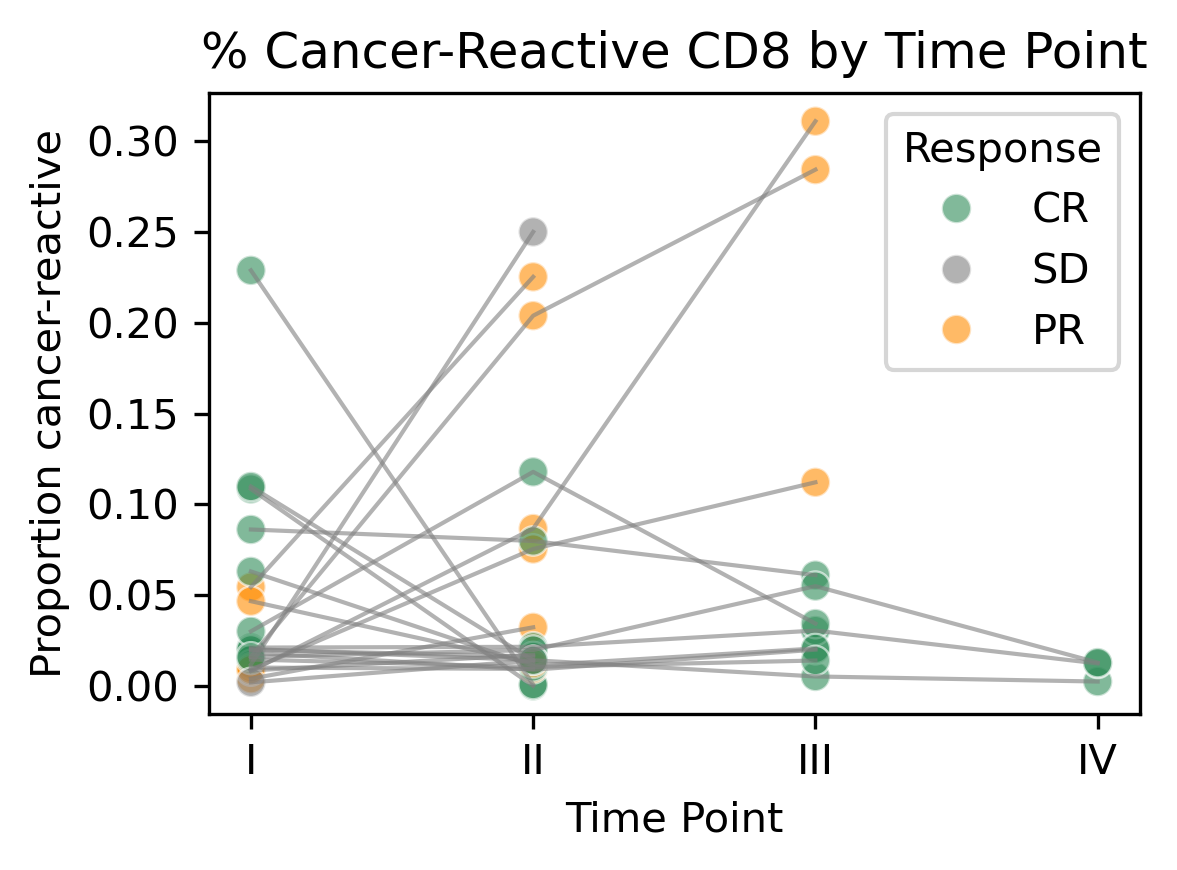

In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300   # affects inline plots
plt.rcParams['savefig.dpi'] = 300  # affects saved plots

palette = {"CR": "seagreen", "PR": "darkorange", "SD": "gray"}

# make Time point in the right order
treat_order = ['I','II','III','IV']
df_prop['TimePoint'] = pd.Categorical(df_prop['TimePoint'],
                                      categories=treat_order,
                                      ordered=True)

# plot
plt.figure(figsize=(4,3))

# draw one line per Patient, connecting their points (no aggregation)
sns.lineplot(
    data=df_prop,
    x='TimePoint',
    y='prop_reactive',
    units='Patient',      # draw each Patient’s line
    estimator=None,       # raw values, not aggregate
    lw=1,                 # line width
    alpha=0.6,            # make them a bit transparent if many
    color='grey'          # neutral line color
)

sns.scatterplot(
    data=df_prop,
    x='TimePoint',
    y='prop_reactive',
    hue='Response',
    alpha=0.6,   
    palette=palette,
    s=50
)

plt.title('% Cancer-Reactive CD8 by Time Point')
plt.xlabel('Time Point')
plt.ylabel('Proportion cancer-reactive')
plt.tight_layout()
plt.show()

# CD4

In [8]:
cell_data_CD4 = pd.read_csv("cell_meta_data_CD4_cleaned.csv", index_col=0)

cell_data_CD4.rename(columns={"Treatment": "TimePoint"}, inplace=True)
cell_data_CD4


,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,orig.ident,nCount_RNA,nFeature_RNA,Ident,Patient,TimePoint,Tissue,MajorCellType,SubCellType,cluster,CD4_score,CD8_score,cell_type_by_cluster,cell_type_true_label,highlight,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cluster_CD4,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
CRC01-B-III_AACACGTGTGACGCCT,-0.086045,0.573601,0.154185,-0.018973,0.664372,1.143237,1517,7.325149,5009,8.519191,42.283889,57.436614,67.578359,79.696546,SeuratProject,5009,1517,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,0,-0.173521,-0.526486,CD4,CD4,Other,0.255358,0.512850,False,0,False,False,AACACGTGTGACGCCT-1,TRAV12-2_TGTGCCGTGAACAAGAACCAGGCAGGAACTGCTCTGA...,CAVNKNQAGTALIF,TGTGCCGTGAACAAGAACCAGGCAGGAACTGCTCTGATCTTT,TRAV12-2,TRAJ15,2102.0,5.0,547.0,True,TRBV6-1_TGTGCCAGCAGTGAGACGGGGAATCAGCCCCAGCATTT...,CASSETGNQPQHF,TGTGCCAGCAGTGAGACGGGGAATCAGCCCCAGCATTTT,TRBV6-1,TRBJ1-5,2090.0,7.0,503.0,True
CRC01-B-III_AACGTTGCATCGACGC,-0.084918,0.459178,-0.112062,-0.080561,0.628553,1.330443,1536,7.337588,4632,8.440960,40.630397,54.512090,64.810017,77.633851,SeuratProject,4632,1536,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,0,-0.338328,-0.610371,CD4,CD4,Other,-0.549320,0.208222,False,0,False,False,AACGTTGCATCGACGC-1,TRAV9-2_TGTGCTCTATCAGGATACAGCACCCTCACCTTT_TRAJ11,CALSGYSTLTF,TGTGCTCTATCAGGATACAGCACCCTCACCTTT,TRAV9-2,TRAJ11,2588.0,3.0,486.0,True,TRBV12-4_TGTGCCAGCAGCGACGGCACCTACAGGGGAGGGTCGA...,CASSDGTYRGGSTLAKNIQYF,TGTGCCAGCAGCGACGGCACCTACAGGGGAGGGTCGACCCTAGCCA...,TRBV12-4,TRBJ2-4,4670.0,12.0,532.0,True
CRC01-B-III_AACTCCCGTGACAAAT,-0.099417,0.304955,-0.060730,-0.174460,0.677877,0.923615,1286,7.160069,3999,8.294050,43.810953,57.264316,67.666917,80.345086,SeuratProject,3999,1286,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,0,-0.078177,-0.564093,CD4,CD4,Other,-0.645872,-0.944247,False,0,False,False,AACTCCCGTGACAAAT-1,TRAV21_TGTGCTGTTCCTCCAACTGGGGCTGGGAGTTACCAACTC...,CAVPPTGAGSYQLTF,TGTGCTGTTCCTCCAACTGGGGCTGGGAGTTACCAACTCACTTTC,TRAV21,TRAJ28,3706.0,6.0,526.0,True,TRBV12-4_TGTGCCAGCAGCACTAGTAGGGGGAACACTGAAGCTT...,CASSTSRGNTEAFF,TGTGCCAGCAGCACTAGTAGGGGGAACACTGAAGCTTTCTTT,TRBV12-4,TRBJ1-1,4222.0,11.0,504.0,True
CRC01-B-III_AAGGCAGCAAGTCATC,-0.139485,0.572399,0.050019,-0.094784,0.598639,1.089804,1341,7.201916,4664,8.447843,46.462264,61.578045,71.440823,81.968268,SeuratProject,4664,1341,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,10,0.367465,-0.503090,CD4,CD4,Other,-0.377067,0.447299,False,10,False,False,AAGGCAGCAAGTCATC-1,TRAV21_TGTGCTGTGAGGCCACCGGGTTCTGCAAGGCAACTGACC...,CAVRPPGSARQLTF,TGTGCTGTGAGGCCACCGGGTTCTGCAAGGCAACTGACCTTT,TRAV21,TRAJ22,940.0,4.0,553.0,True,TRBV9_TGTGCCAGCAGCGTAGAGGGCAGGGGAGTGAATGAGCAGT...,CASSVEGRGVNEQFF,TGTGCCAGCAGCGTAGAGGGCAGGGGAGTGAATGAGCAGTTCTTC,TRBV9,TRBJ2-1,5780.0,14.0,499.0,True
CRC01-B-III_AAGGCAGGTGTGGTTT,-0.107221,0.475840,0.092547,-0.105746,0.519128,0.870066,1085,6.990257,3649,8.202482,46.177035,62.263634,72.896684,83.968210,SeuratProject,3649,1085,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,0,0.536377,-0.438637,CD4,CD4,Other,-0.354980,-0.234897,False,0,False,False,AAGGCAGGTGTGGTTT-1,TRAV13-2_TGTGCAGAGTCGTACTCTGGGGGTTACCAGAAAGTTA...,CAESYSGGYQKVTF,TGTGCAGAGTCGTACTCTGGGGGTTACCAGAAAGTTACCTTT,TRAV13-2,TRAJ13,2208.0,4.0,512.0,True,TRBV24-1_TGTGCCACCAGTGATCCCCTGGGGACCCAGTACTTC_...,CATSDPLGTQYF,TGTGCCACCAGTGATCCCCTGGGGACCCAGTACTTC,TRBV24-1,TRBJ2-5,4788.0,11.0,479.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [9]:
cell_data_CD4 = cell_data_CD4[
    (cell_data_CD4['Tissue'] != 'TN') &
    (cell_data_CD4['Tissue'] != 'LN')
]
cell_data_CD4.index = cell_data_CD4.index + "-Chen_2024"
cell_data_CD4



,CD4_Caushi_Tfh2_66g,CD4_Lowery_neg_37g,CD4_Lowery_pos_40g,CD4_Oh_CXCL13_50g,CD4_ave_Hanada_pos_9g,CD4_ave_Hanada_neg_4g,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,orig.ident,nCount_RNA,nFeature_RNA,Ident,Patient,TimePoint,Tissue,MajorCellType,SubCellType,cluster,CD4_score,CD8_score,cell_type_by_cluster,cell_type_true_label,highlight,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,cluster_CD4,cancer_reactive_per_cell,cancer_reactive_by_cluster,barcode,Identifier(Alpha),CDR3(Alpha),CDR3_nt(Alpha),V_gene(Alpha),J_gene(Alpha),nRead(Alpha),nUMI(Alpha),Length(Alpha),Full_length(Alpha),Identifier(Beta),CDR3(Beta),CDR3_nt(Beta),V_gene(Beta),J_gene(Beta),nRead(Beta),nUMI(Beta),Length(Beta),Full_length(Beta)
CRC01-B-III_AACACGTGTGACGCCT-Chen_2024,-0.086045,0.573601,0.154185,-0.018973,0.664372,1.143237,1517,7.325149,5009,8.519191,42.283889,57.436614,67.578359,79.696546,SeuratProject,5009,1517,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,0,-0.173521,-0.526486,CD4,CD4,Other,0.255358,0.512850,False,0,False,False,AACACGTGTGACGCCT-1,TRAV12-2_TGTGCCGTGAACAAGAACCAGGCAGGAACTGCTCTGA...,CAVNKNQAGTALIF,TGTGCCGTGAACAAGAACCAGGCAGGAACTGCTCTGATCTTT,TRAV12-2,TRAJ15,2102.0,5.0,547.0,True,TRBV6-1_TGTGCCAGCAGTGAGACGGGGAATCAGCCCCAGCATTT...,CASSETGNQPQHF,TGTGCCAGCAGTGAGACGGGGAATCAGCCCCAGCATTTT,TRBV6-1,TRBJ1-5,2090.0,7.0,503.0,True
CRC01-B-III_AACGTTGCATCGACGC-Chen_2024,-0.084918,0.459178,-0.112062,-0.080561,0.628553,1.330443,1536,7.337588,4632,8.440960,40.630397,54.512090,64.810017,77.633851,SeuratProject,4632,1536,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,0,-0.338328,-0.610371,CD4,CD4,Other,-0.549320,0.208222,False,0,False,False,AACGTTGCATCGACGC-1,TRAV9-2_TGTGCTCTATCAGGATACAGCACCCTCACCTTT_TRAJ11,CALSGYSTLTF,TGTGCTCTATCAGGATACAGCACCCTCACCTTT,TRAV9-2,TRAJ11,2588.0,3.0,486.0,True,TRBV12-4_TGTGCCAGCAGCGACGGCACCTACAGGGGAGGGTCGA...,CASSDGTYRGGSTLAKNIQYF,TGTGCCAGCAGCGACGGCACCTACAGGGGAGGGTCGACCCTAGCCA...,TRBV12-4,TRBJ2-4,4670.0,12.0,532.0,True
CRC01-B-III_AACTCCCGTGACAAAT-Chen_2024,-0.099417,0.304955,-0.060730,-0.174460,0.677877,0.923615,1286,7.160069,3999,8.294050,43.810953,57.264316,67.666917,80.345086,SeuratProject,3999,1286,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,0,-0.078177,-0.564093,CD4,CD4,Other,-0.645872,-0.944247,False,0,False,False,AACTCCCGTGACAAAT-1,TRAV21_TGTGCTGTTCCTCCAACTGGGGCTGGGAGTTACCAACTC...,CAVPPTGAGSYQLTF,TGTGCTGTTCCTCCAACTGGGGCTGGGAGTTACCAACTCACTTTC,TRAV21,TRAJ28,3706.0,6.0,526.0,True,TRBV12-4_TGTGCCAGCAGCACTAGTAGGGGGAACACTGAAGCTT...,CASSTSRGNTEAFF,TGTGCCAGCAGCACTAGTAGGGGGAACACTGAAGCTTTCTTT,TRBV12-4,TRBJ1-1,4222.0,11.0,504.0,True
CRC01-B-III_AAGGCAGCAAGTCATC-Chen_2024,-0.139485,0.572399,0.050019,-0.094784,0.598639,1.089804,1341,7.201916,4664,8.447843,46.462264,61.578045,71.440823,81.968268,SeuratProject,4664,1341,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,10,0.367465,-0.503090,CD4,CD4,Other,-0.377067,0.447299,False,10,False,False,AAGGCAGCAAGTCATC-1,TRAV21_TGTGCTGTGAGGCCACCGGGTTCTGCAAGGCAACTGACC...,CAVRPPGSARQLTF,TGTGCTGTGAGGCCACCGGGTTCTGCAAGGCAACTGACCTTT,TRAV21,TRAJ22,940.0,4.0,553.0,True,TRBV9_TGTGCCAGCAGCGTAGAGGGCAGGGGAGTGAATGAGCAGT...,CASSVEGRGVNEQFF,TGTGCCAGCAGCGTAGAGGGCAGGGGAGTGAATGAGCAGTTCTTC,TRBV9,TRBJ2-1,5780.0,14.0,499.0,True
CRC01-B-III_AAGGCAGGTGTGGTTT-Chen_2024,-0.107221,0.475840,0.092547,-0.105746,0.519128,0.870066,1085,6.990257,3649,8.202482,46.177035,62.263634,72.896684,83.968210,SeuratProject,3649,1085,8,P01,III,Blood,T,c01_CD4_Tn_CCR7,0,0.536377,-0.438637,CD4,CD4,Other,-0.354980,-0.234897,False,0,False,False,AAGGCAGGTGTGGTTT-1,TRAV13-2_TGTGCAGAGTCGTACTCTGGGGGTTACCAGAAAGTTA...,CAESYSGGYQKVTF,TGTGCAGAGTCGTACTCTGGGGGTTACCAGAAAGTTACCTTT,TRAV13-2,TRAJ13,2208.0,4.0,512.0,True,TRBV24-1_TGTGCCACCAGTGATCCCCTGGGGACCCAGTACTTC_...,CATSDPLGTQYF,TGTGCCACCAGTGATCCCCTGGGGACCCAGTACTTC,TRBV24-1,TRBJ2-5,4788.0,11.0,479.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
CD4_CR = pd.read_csv("../data/CD4_CAT_final.tsv", sep='\t', index_col=0)
CD4_CR


,n_genes_by_counts,total_counts,TRB_cdr3,TRB_v_gene,TRA_cdr3,TRA_v_gene,clone,cell_id,study,cancer_type,Patient,Sample,Treatment,Tissue,pos_score_CD4,neg_score_CD4,total_cells_patient,clone_number_per_patient,clone_number_total,clone_n_patient,clone_number_per_patient_median,clone_freq_per_patient,label,Prediction,TCR_asso_mutation
cell_study_id,,,,,,,,,,,,,,,,,,,,,,,,,
P454-GATTCAGGTAGTAGTA-1-Liu_2025,1607,3133,CAAGGREGDTQYF,TRBV7-8,CVVSPYSSASKIIF,TRAV10,TRAV10_CVVSPYSSASKIIF_TRBV7-8_CAAGGREGDTQYF,P454-GATTCAGGTAGTAGTA-1,Liu_2025,NSCLC,Liu2025_P454,P454,anti-PD-1,Tumor,2.522603,-0.202203,1541,3,3,1,3.0,0.001947,1,0.915280,neither
P454-TTCTTAGGTGTATGGG-1-Liu_2025,2092,5382,CAAGGREGDTQYF,TRBV7-8,CVVSPYSSASKIIF,TRAV10,TRAV10_CVVSPYSSASKIIF_TRBV7-8_CAAGGREGDTQYF,P454-TTCTTAGGTGTATGGG-1,Liu_2025,NSCLC,Liu2025_P454,P454,anti-PD-1,Tumor,2.486799,-0.766931,1541,3,3,1,3.0,0.001947,1,0.724631,neither
P399-ACGGGCTTCGGCGCAT-1-Liu_2025,1414,3260,CAASGRITGELFF,TRBV10-3,CAVSDRAGNQFYF,TRAV8-6,TRAV8-6_CAVSDRAGNQFYF_TRBV10-3_CAASGRITGELFF,P399-ACGGGCTTCGGCGCAT-1,Liu_2025,NSCLC,Liu2025_P399,P399,anti-PD-1,Tumor,1.639020,-0.921173,1138,3,3,1,3.0,0.002636,1,0.848559,neither
P399-GGTGCGTCATGCAACT-1-Liu_2025,1063,2220,CAASGRITGELFF,TRBV10-3,CAVSDRAGNQFYF,TRAV8-6,TRAV8-6_CAVSDRAGNQFYF_TRBV10-3_CAASGRITGELFF,P399-GGTGCGTCATGCAACT-1,Liu_2025,NSCLC,Liu2025_P399,P399,anti-PD-1,Tumor,1.228189,-1.269071,1138,3,3,1,3.0,0.002636,1,0.741201,neither
P209-TGCCCTAAGTCAATAG-1-Liu_2025,2530,5691,CACFGQNTGELFF,TRBV30,CAESKGVNDMRF,TRAV5,TRAV5_CAESKGVNDMRF_TRBV30_CACFGQNTGELFF,P209-TGCCCTAAGTCAATAG-1,Liu_2025,NSCLC,Liu2025_P209,P209,anti-PD-1,Tumor,3.677561,-1.421460,2307,3,3,1,3.0,0.001300,1,0.988071,neither
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRC09-N-I_ACTTTCACACAGGAGT-Chen_2024,1462,2854,CSVVRVDEQYF,TRBV29-1,CAVRAAGNKLTF,TRAV21,TRAV21_CAVRAAGNKLTF_TRBV29-1_CSVVRVDEQYF,CRC09-N-I_ACTTTCACACAGGAGT,Chen_2024,COAD,Chen2024_P09,P09-N-I,anti-PD-1,Normal,0.100638,-0.130692,2060,4,4,1,4.0,0.001942,1,0.790262,alpha
CRC09-T-I_GATTCAGGTGGAAAGA-Chen_2024,926,2079,CSVVRVDEQYF,TRBV29-1,CAVRAAGNKLTF,TRAV21,TRAV21_CAVRAAGNKLTF_TRBV29-1_CSVVRVDEQYF,CRC09-T-I_GATTCAGGTGGAAAGA,Chen_2024,COAD,Chen2024_P09,P09-T-I,anti-PD-1,Tumor,-0.002595,-0.921684,2060,4,4,1,4.0,0.001942,1,0.571713,alpha
TCCCGATTCGCCCTTA.27-MM-Zheng_2021,1860,4688,CTTGQGNNEQFF,TRBV20-1,CAYNSYNQGGKLIF,TRAV38-2DV8,TRAV38-2DV8_CAYNSYNQGGKLIF_TRBV20-1_CTTGQGNNEQFF,TCCCGATTCGCCCTTA.27-MM,Zheng_2021,MM,Zheng2021_MM-P20190122,MM-P20190122,NaN,Tumor,0.460801,-0.156342,965,19,19,1,19.0,0.019689,1,0.749736,neither


In [11]:
cross_tab = pd.crosstab(
    cell_data_CD4.index.isin(CD4_CR.index),
    cell_data_CD4['cancer_reactive_per_cell']
)

print(cross_tab)

cell_data_CD4["cancer_reactive"] = cell_data_CD4.index.isin(CD4_CR.index).astype(int)

cross_tab = pd.crosstab(
    cell_data_CD4['cancer_reactive'],
    cell_data_CD4['cancer_reactive_per_cell']
)

print(cross_tab)


cancer_reactive_per_cell   False  True 
row_0                                  
False                     100814  29419
True                          10    271
cancer_reactive_per_cell   False  True 
cancer_reactive                        
0                         100814  29419
1                             10    271


/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_50588/775008892.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_data_CD4["cancer_reactive"] = cell_data_CD4.index.isin(CD4_CR.index).astype(int)


In [12]:
df_prop = (
    cell_data_CD4
    .groupby(['Patient','TimePoint'])['cancer_reactive']
    .mean()                        # True/False are treated as 1/0 so mean gives the fraction
    .reset_index(name='prop_reactive')
)

print(df_prop.shape)

df_prop = df_prop.merge(df, on="Patient", how="left", validate="many_to_one")
print(df_prop.shape)
df_prop


(58, 3)
(58, 17)


,Patient,TimePoint,prop_reactive,Age,Gender,Cancer Type,Tumor Location,TNM,Tumor stage,dMMR/pMMR,MSI/MSS,POLE Mutation,TMB (Muts/Mb),Tumor Regression Ratio,Response,TRG status,Treatment Regimen
0,P01,I,0.000000,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
1,P01,II,0.000000,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
2,P01,III,0.000000,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
3,P01,IV,0.000000,51,Male,CRC,Descending colon,T4bN0M0,II,dMMR,MSS,Yes,Not avaliable,0.5648,CR,TRG0,Pembrolizumab
4,P02,I,0.004785,56,Male,CRC,Ascending colon,T4bN2M1,IV,pMMR,MSS,No,3.58,-0.0196,SD,TRG3,Pembrolizumab
5,P02,II,0.001370,56,Male,CRC,Ascending colon,T4bN2M1,IV,pMMR,MSS,No,3.58,-0.0196,SD,TRG3,Pembrolizumab
6,P03,I,0.000316,66,Male,CRC,Low rectum,T3bN2aM0,III,pMMR,MSS,No,Not avaliable,0.4541,PR,TRG2,Pembrolizumab + CapeOx
7,P03,II,0.003049,66,Male,CRC,Low rectum,T3bN2aM0,III,pMMR,MSS,No,Not avaliable,0.4541,PR,TRG2,Pembrolizumab + CapeOx
8,P03,III,0.005914,66,Male,CRC,Low rectum,T3bN2aM0,III,pMMR,MSS,No,Not avaliable,0.4541,PR,TRG2,Pembrolizumab + CapeOx
9,P04,I,0.007693,47,Female,CRC,Ascending colon,T4aN+M0,III,dMMR,MSI,No,487,0.9180,CR,TRG0,Pembrolizumab


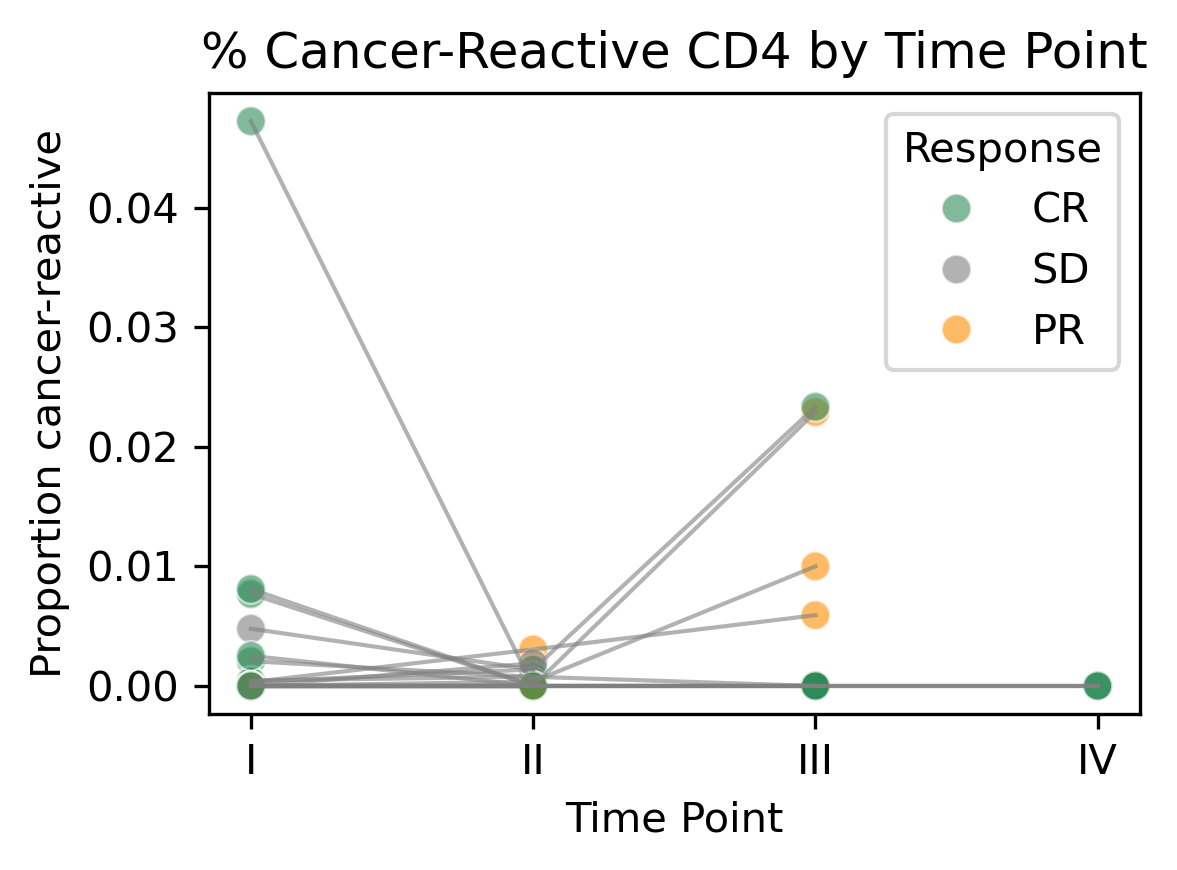

In [13]:
palette = {"CR": "seagreen", "PR": "darkorange", "SD": "gray"}

# make Time point in the right order
treat_order = ['I','II','III','IV']
df_prop['TimePoint'] = pd.Categorical(df_prop['TimePoint'],
                                      categories=treat_order,
                                      ordered=True)

# plot
plt.figure(figsize=(4,3))

# draw one line per Patient, connecting their points (no aggregation)
sns.lineplot(
    data=df_prop,
    x='TimePoint',
    y='prop_reactive',
    units='Patient',      # draw each Patient’s line
    estimator=None,       # raw values, not aggregate
    lw=1,                 # line width
    alpha=0.6,            # make them a bit transparent if many
    color='grey'          # neutral line color
)

sns.scatterplot(
    data=df_prop,
    x='TimePoint',
    y='prop_reactive',
    hue='Response',
    alpha=0.6,   
    palette=palette,
    s=50
)

plt.title('% Cancer-Reactive CD4 by Time Point')
plt.xlabel('Time Point')
plt.ylabel('Proportion cancer-reactive')
plt.tight_layout()
plt.show()

# Cell Tissue Types

In [14]:
mask = cell_data_CD8["TimePoint"].astype(str).str.upper().eq("I")

df_tiss = (
    cell_data_CD8.loc[mask]
    .groupby(["Patient", "Tissue"], as_index=False)["cancer_reactive"]
    .mean()
    .rename(columns={"cancer_reactive": "prop_reactive"})
)


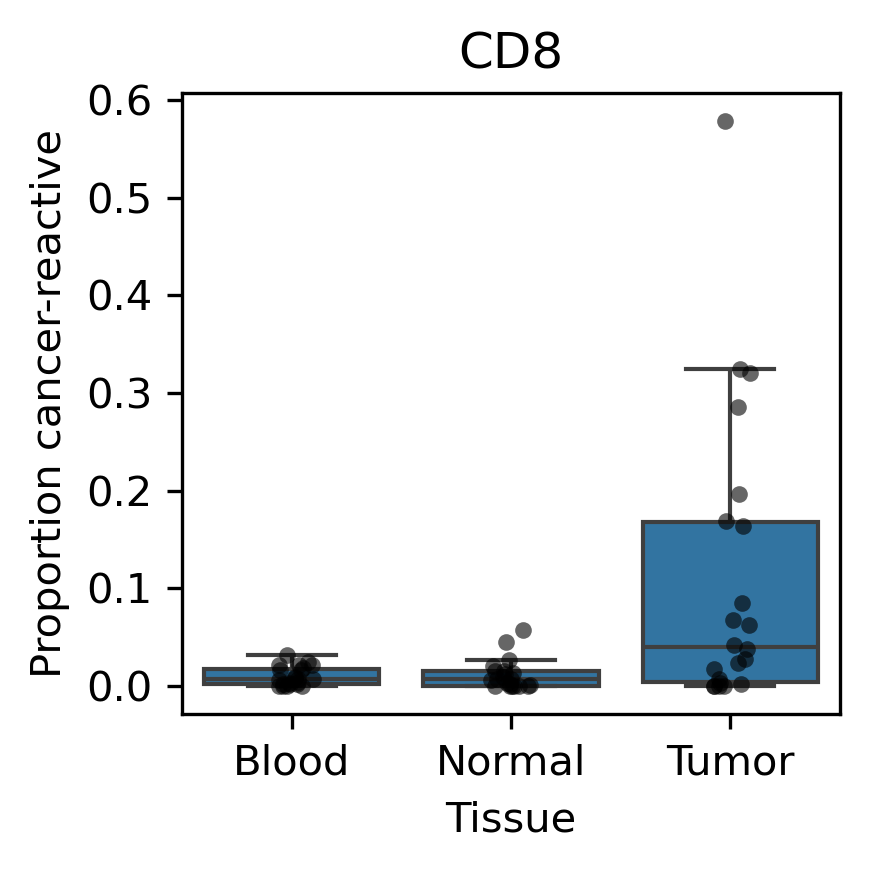

In [15]:
plt.figure(figsize=(3,3))
sns.boxplot(
    data=df_tiss,
    x='Tissue',
    y='prop_reactive',
    order=sorted(df_tiss['Tissue'].unique()), 
    showfliers=False
)
sns.stripplot(
    data=df_tiss,
    x='Tissue',
    y='prop_reactive',
    order=sorted(df_tiss['Tissue'].unique()),
    color='k', size=4, alpha=0.6, jitter=True
)
plt.title('CD8')
plt.xlabel('Tissue')
plt.ylabel('Proportion cancer-reactive')
plt.tight_layout()
plt.show()

# Plots of interest

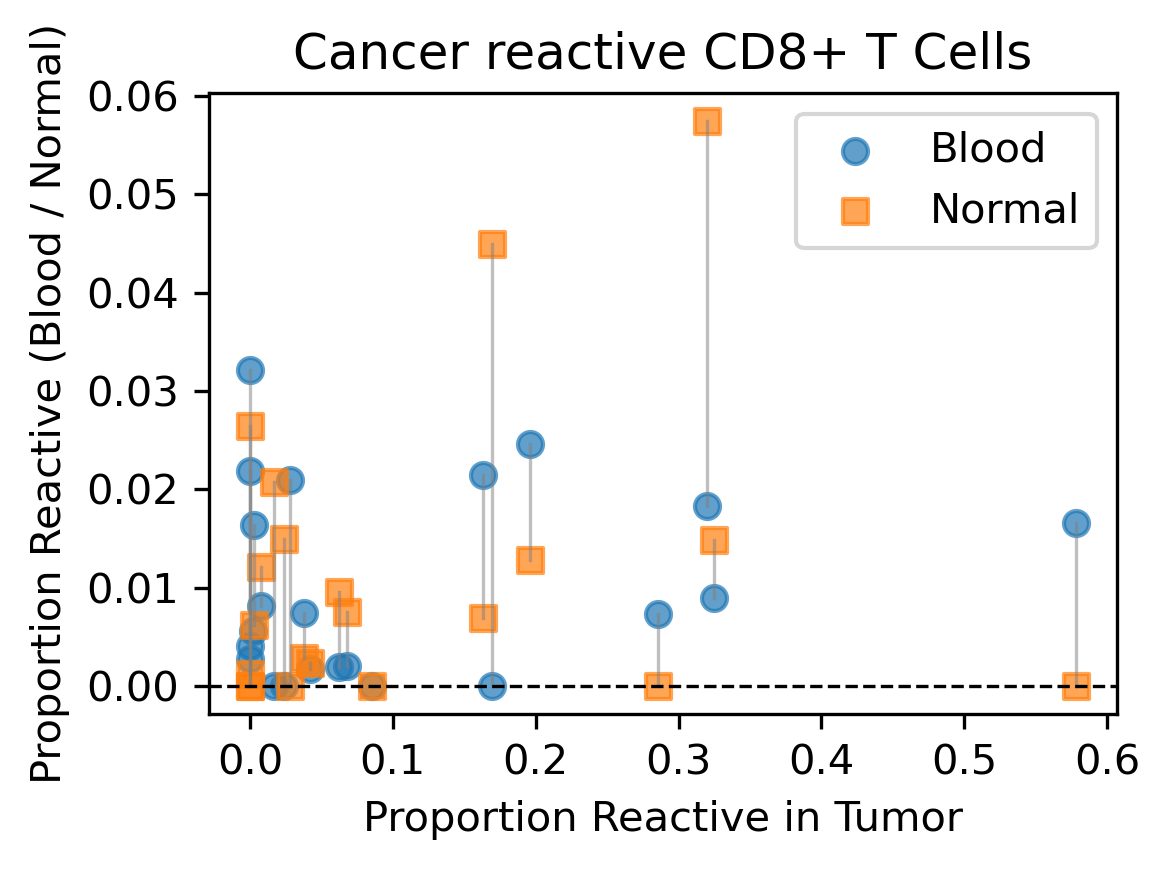

In [16]:
import matplotlib.pyplot as plt
df_wide = df_tiss.pivot(index='Patient', columns='Tissue', values='prop_reactive')

plt.figure(figsize=(4,3))

# first all Blood points, then all Normal points
plt.scatter(df_wide['Tumor'], df_wide['Blood'],
            marker='o', label='Blood', alpha=0.7)   # add transparency
plt.scatter(df_wide['Tumor'], df_wide['Normal'],
            marker='s', label='Normal', alpha=0.7)  # add transparency

# connect each patient’s Blood and Normal at the same x=Tumor
for patient, row in df_wide.iterrows():
    plt.plot([row['Tumor'], row['Tumor']],
             [row['Blood'], row['Normal']],
             color='gray', alpha=0.5, linewidth=0.8)

# horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Labels, legend, title
plt.xlabel('Proportion Reactive in Tumor')
plt.ylabel('Proportion Reactive (Blood / Normal)')
plt.title('Cancer reactive CD8+ T Cells')
plt.legend()
plt.tight_layout()
plt.show()


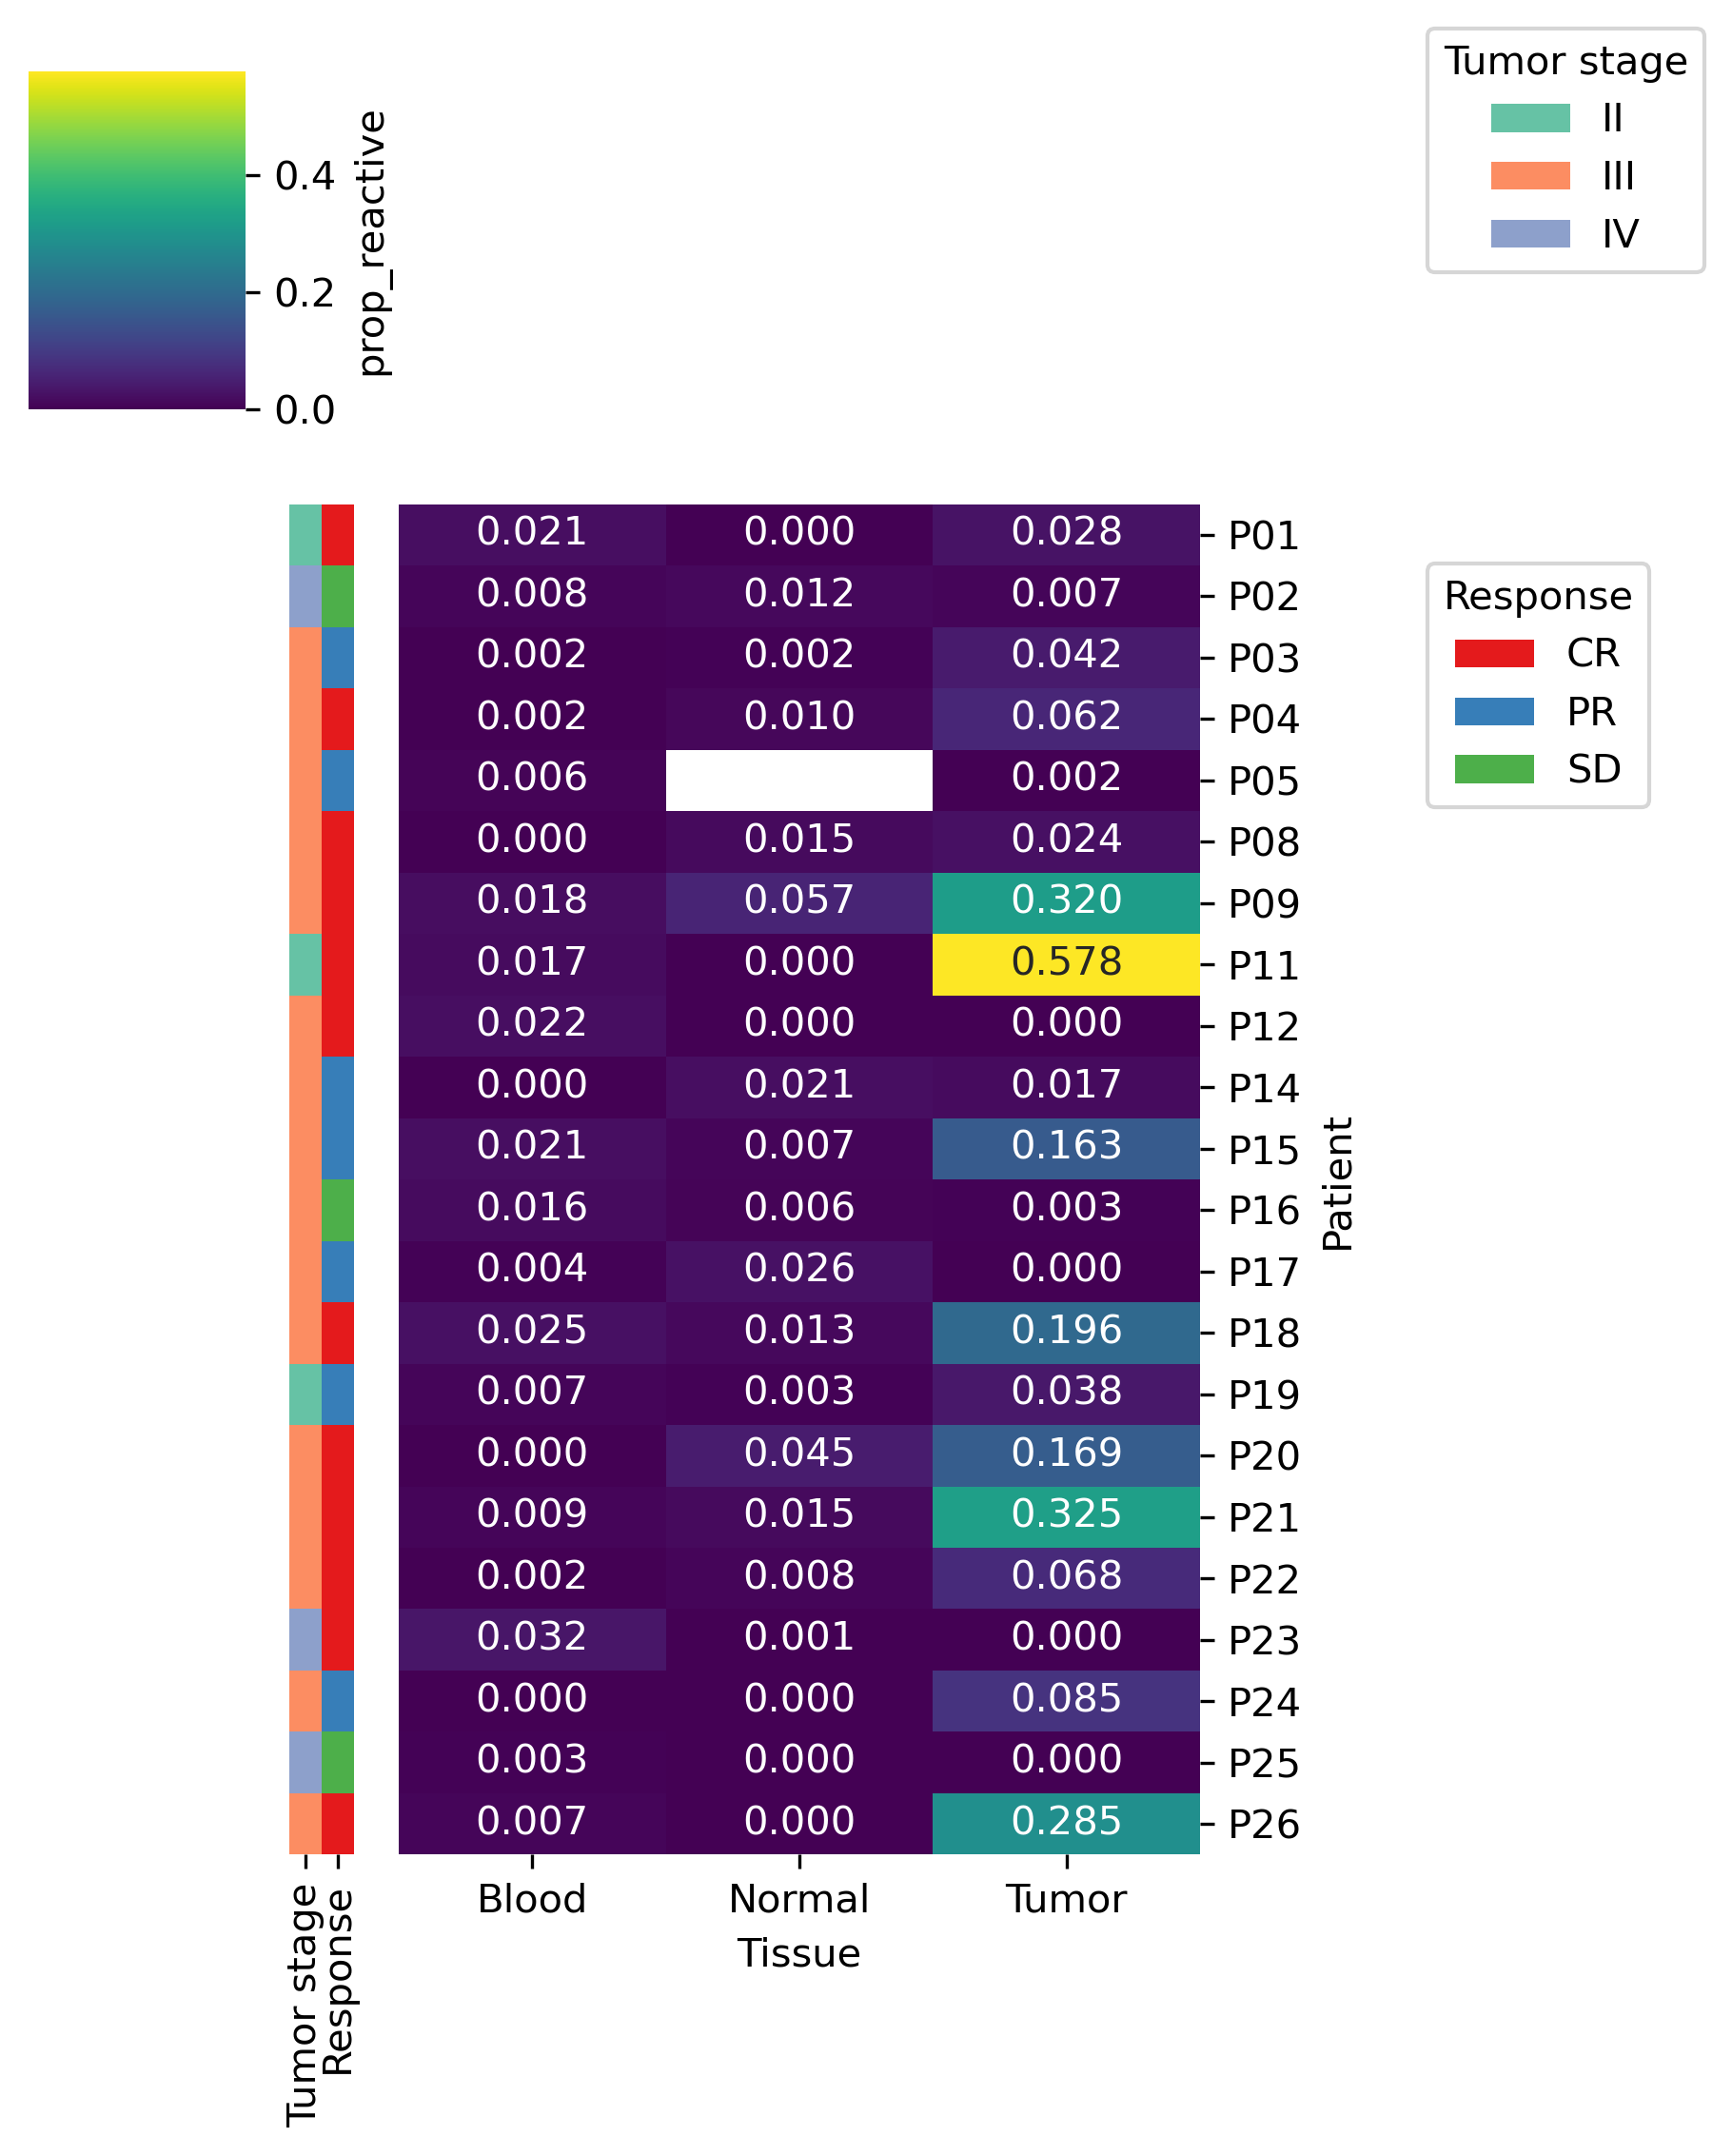

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ──load / pivot your data ───────────────────────────────────────────────
df_meta = (
    pd.read_excel(
        "1-s2.0-S1535610824002344-mmc2.xlsx",
        sheet_name="scRNA-seq patient meta",
        header=1
    )
    .set_index("Patient ID")
)

mat = df_tiss.pivot(index='Patient', columns='Tissue', values='prop_reactive')
if isinstance(mat.index, pd.MultiIndex):
    mat.index = mat.index.get_level_values("Patient")
    mat.index.name = "Patient"
# ── 2) pick your annot columns and force categorical ordering ───────────────
annot_cols = ["Tumor stage", "Response"]

# Tumor stage in the exact order II, III, IV:
df_meta["Tumor stage"] = pd.Categorical(
    df_meta["Tumor stage"],
    categories=["II","III","IV"],
    ordered=True
)

# If you also want Response in a particular order, do the same:
df_meta["Response"] = pd.Categorical(
    df_meta["Response"],
    categories=["CR","PR","SD"],
    ordered=True
)

# ──build one color‐lut per annot_col ───────────────────────────────────
pal_stage = sns.color_palette("Set2", n_colors=df_meta["Tumor stage"].cat.categories.size)
lut_stage = dict(zip(df_meta["Tumor stage"].cat.categories, pal_stage))

pal_resp = sns.color_palette("Set1", n_colors=df_meta["Response"].cat.categories.size)
lut_resp = dict(zip(df_meta["Response"].cat.categories, pal_resp))

# ──map to colors (as a DataFrame: one column per annotation) ───────────
patients = mat.index.tolist()

# pull out the values as plain strings
stage_vals = df_meta["Tumor stage"].reindex(patients).astype(str)
resp_vals  = df_meta["Response"].reindex(patients).astype(str)

# now .map is the “generic” Series.map (not the Categorical.map)
stage_colors = stage_vals.map(lut_stage)
resp_colors  = resp_vals.map(lut_resp)

row_colors = pd.DataFrame({
    "Tumor stage": stage_colors,
    "Response":    resp_colors,
}, index=patients)



# ──draw the clustermap ─────
g = sns.clustermap(
    mat,
    row_cluster=False,
    col_cluster=False,
    cmap="viridis",
    annot=True, fmt=".3f",
    cbar_kws={'label': 'prop_reactive'},
    row_colors=row_colors,
    figsize=(5,7.5)
)

# ─add one legend per annotation, in your categorical order ─────────────
annotations = [("Tumor stage", lut_stage), ("Response", lut_resp)]
y0 = 1.00
dy = 0.25   # vertical spacing between legends

for i, (col, lut) in enumerate(annotations):
    handles = [Patch(facecolor=lut[val], label=val) for val in lut]
    g.fig.legend(
        handles=handles,
        title=col,
        loc='upper left',
        bbox_to_anchor=(1.02, y0 - i*dy),
        borderaxespad=0
    )

# ── final labels & layout ────────────────────────────────────────────────
g.ax_heatmap.set_xlabel("Tissue")
g.ax_heatmap.set_ylabel("Patient")
plt.tight_layout()
plt.show()

In [18]:

# Aggregate at the patient level:
mask = cell_data_CD8["TimePoint"].astype(str).str.upper().eq("I")


agg = (
    cell_data_CD8[mask]
    .groupby("Patient")["cancer_reactive"]
    .agg(n_reactive="sum",      # True→1, False→0, so sum is # of reactive cells
         n_total="count")       # total CD8 cells per patient
)

agg["prop_reactive"] = agg["n_reactive"] / agg["n_total"]

# Pull in the “Response” column from your metadata:
#    (make sure the index of df_meta is exactly the same Patient IDs)
agg = agg.merge(
    df_meta[["Response"]],      # grab only the “Response” column
    how="left",
    left_index=True,
    right_index=True
)

agg



,n_reactive,n_total,prop_reactive,Response
Patient,,,,
P01,57,2804,0.020328,CR
P02,16,1880,0.008511,SD
P03,35,2196,0.015938,PR
P04,80,4383,0.018252,CR
P05,11,2765,0.003978,PR
P08,42,1989,0.021116,CR
P09,220,2029,0.108428,CR
P11,500,2185,0.228833,CR
P12,23,1159,0.019845,CR


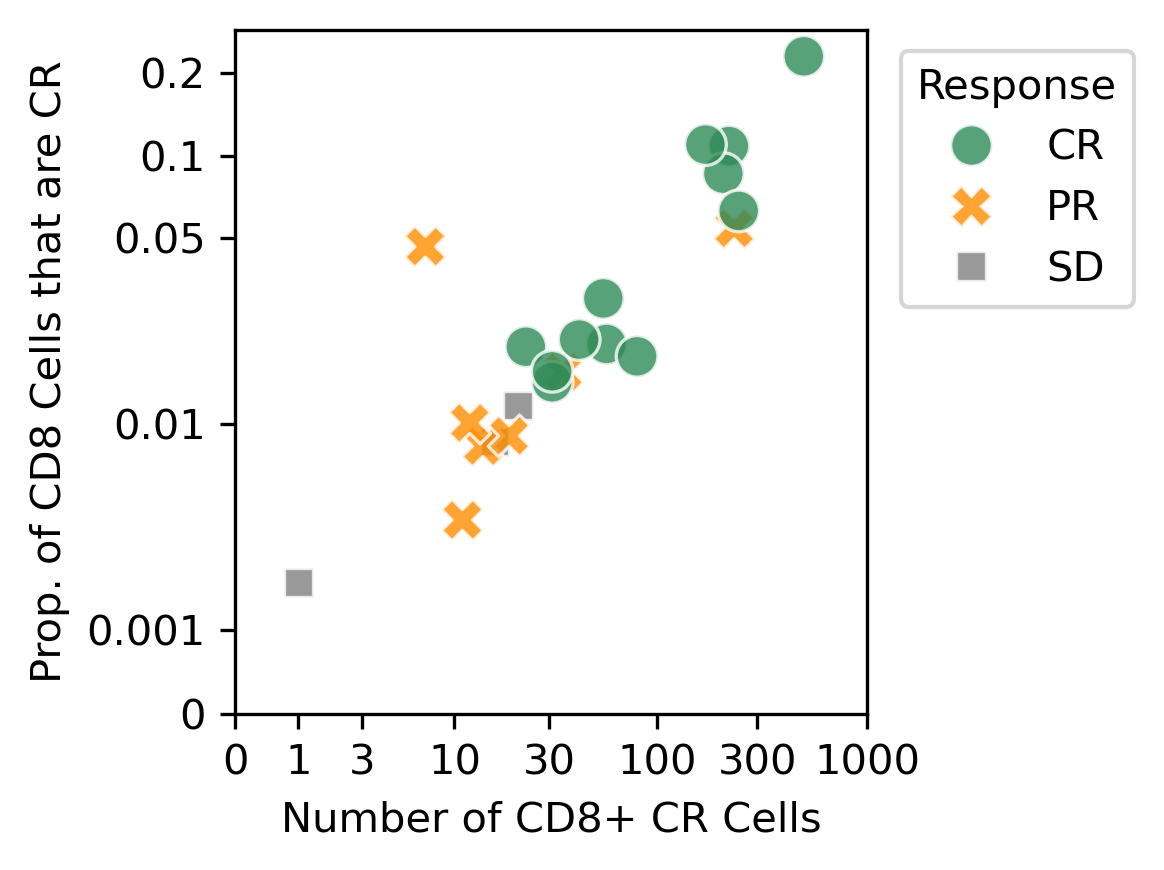

In [19]:
from matplotlib.ticker import FuncFormatter

palette = {"CR": "seagreen", "PR": "darkorange", "SD": "gray"}

df = agg.reset_index().copy()

# --- transforms ---
# x' = log10(1 + x) ; y' = log10(0.001 + y)
df["x_log"] = np.log10(1.0 + df["n_reactive"])
df["y_log"] = np.log10(0.001 + df["prop_reactive"])

# guard against bad values (NaN, -inf, inf)
mask = np.isfinite(df["x_log"]) & np.isfinite(df["y_log"])
dfp = df.loc[mask].copy()

plt.figure(figsize=(4, 3))
ax = sns.scatterplot(
    data=dfp,
    x="x_log",
    y="y_log",
    hue="Response",
    style="Response",
    s=100,
    palette=palette,
    alpha=0.8
)

y_ticks_orig = [0, 0.001, 0.01, 0.05, 0.1, 0.2]  # adjust to your data range
y_ticks_pos  = [np.log10(0.001 + v) for v in y_ticks_orig]
ax.set_yticks(y_ticks_pos)
ax.set_yticklabels([f"{v:g}" for v in y_ticks_orig])  # original-scale labels

# optional: do the same for x so labels show original counts
# pick some raw x values (counts) you like for ticks:
x_ticks_orig = [0, 1, 3, 10, 30, 100, 300, 1000]               # adjust as needed
x_ticks_pos  = [np.log10(1 + v) for v in x_ticks_orig]
ax.set_xticks(x_ticks_pos)
ax.set_xticklabels([f"{v:g}" for v in x_ticks_orig])

plt.xlabel("Number of CD8+ CR Cells")
plt.ylabel("Prop. of CD8 Cells that are CR")
plt.legend(title="Response", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()



/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_50588/300535957.py:218: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


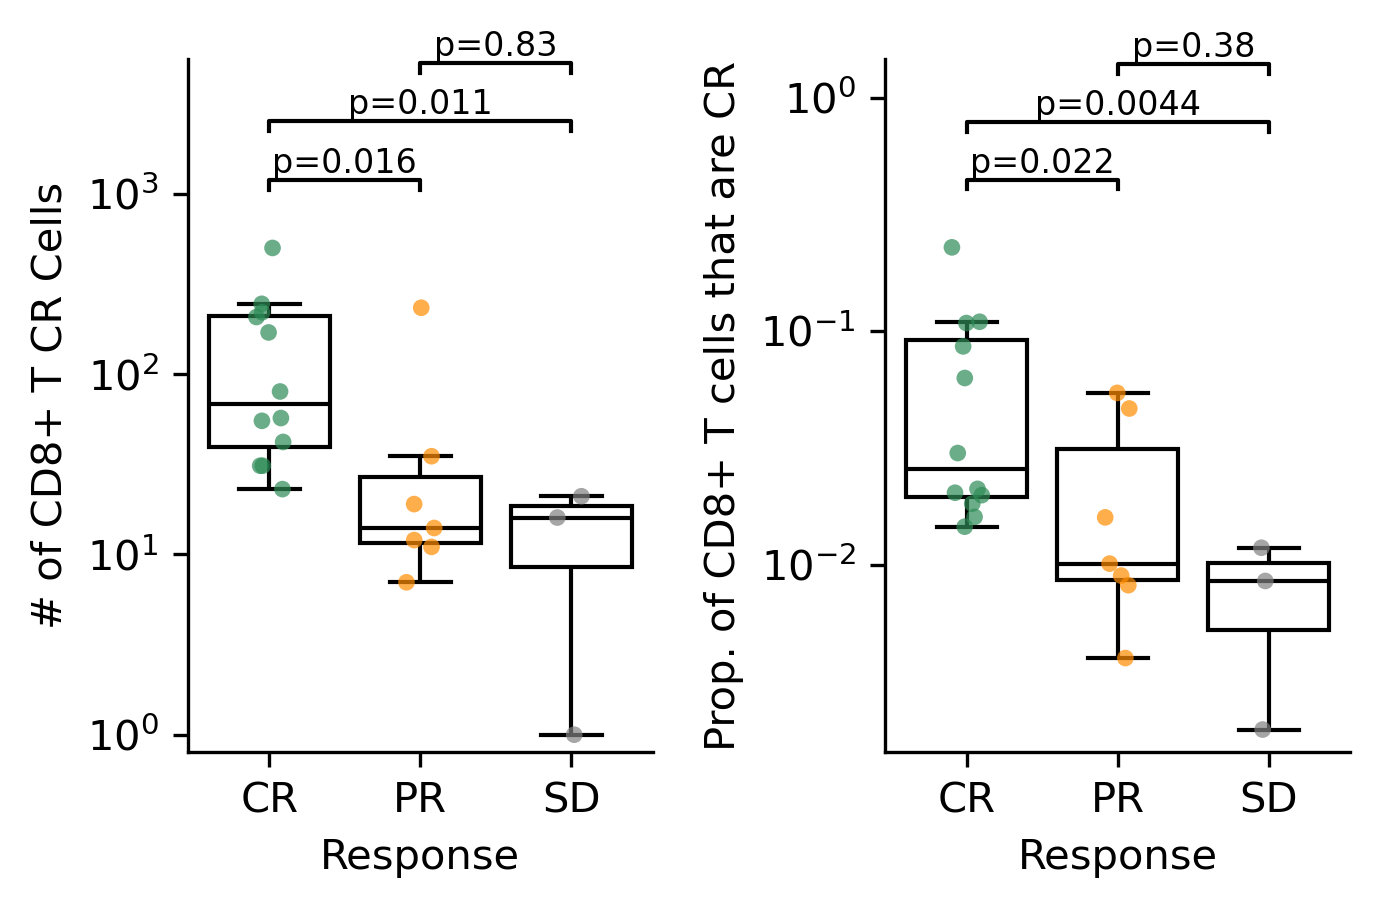

In [20]:
from scipy.stats import mannwhitneyu
import itertools
from statannotations.Annotator import Annotator
from scipy.stats import mannwhitneyu

def overlay_zero_points(ax, data, ycol, resp_order, palette, jitter=0.12):
    # category positions used by seaborn (0,1,2,...)
    xloc = {g:i for i,g in enumerate(resp_order)}
    # current bottom after you've set log scale and ylim
    y_bottom = ax.get_ylim()[0]
    y_zero = y_bottom * 1.05  # a hair above the bottom so they show

    for g in resp_order:
        z = data[(data["Response"]==g) & (data[ycol]==0)]
        if z.empty:
            continue
        # jitter around the category position
        x = xloc[g] + (np.random.rand(len(z)) - 0.5) * jitter
        ax.scatter(
            x, np.full(len(z), y_zero),
            s=10, color=palette[g], linewidth=0.5, alpha=0.7,
            zorder=3, label="_nolegend_"
        )

# function to add p-value text above boxplots

def add_pvalues(ax, data, y, group_col="Response", order=None, pairs=None,
                include_zeros_in_test=True, draw_brackets=False,
                text_fmt="p={:.2g}", step_frac=0.12, line_height_frac=0.02):
    """
    Annotate pairwise Mann–Whitney p-values on a seaborn axis.

    Parameters
    ----------
    ax : matplotlib Axes
    data : DataFrame
    y : str
        Name of the y column.
    group_col : str
        Grouping column (e.g., 'Response').
    order : list[str]
        Category order on the x-axis (e.g., ['pCR','MPR','non-MPR']).
    pairs : list[tuple[str,str]] | None
        Specific pairs to test; default = all pairwise from `order`.
    include_zeros_in_test : bool
        If False, drop zeros from y before the test (useful for log axes).
    draw_brackets : bool
        If True, draw brackets; otherwise just place text.
    text_fmt : str
        Format for p-value text (default two significant digits).
    step_frac, line_height_frac : float
        Vertical spacing parameters (fraction of axis span in the working scale).
    """
    if order is None:
        order = list(data[group_col].dropna().unique())
    else:
        order = list(order)

    # x locations that seaborn uses for categories: 0,1,2,...
    xloc = {g: i for i, g in enumerate(order)}

    # Which pairs to compare?
    if pairs is None:
        pairs = list(itertools.combinations(order, 2))

    # Determine scale mode
    yscale = ax.get_yscale()  # 'linear', 'log', or 'symlog'

    # Values for positioning (don’t include NaNs)
    yvals = data[y].dropna()

    # For log/symlog placement, use positive values to compute top/bottom in log space
    if yscale in ("log", "symlog"):
        ypos = yvals[yvals > 0]
        if ypos.empty:
            return
        y_max = ypos.max()
        y_min_pos = ypos.min()
        # step in log space
        step = (np.log10(y_max) - np.log10(y_min_pos)) * max(step_frac, 1e-3)
        base_log = np.log10(y_max)
        bracket_h = line_height_frac * (np.log10(y_max) - np.log10(y_min_pos) + 1e-9)
        to_data = lambda z: 10**z
        ylim_bottom, ylim_top = ax.get_ylim()
    else:
        y_max = yvals.max()
        y_min = yvals.min()
        yrng = max(y_max - y_min, 1e-9)
        step = step_frac * yrng
        base = y_max
        bracket_h = line_height_frac * yrng
        to_data = lambda z: z
        ylim_bottom, ylim_top = ax.get_ylim()

    # Draw annotations
    top_needed = -np.inf
    for i, (g1, g2) in enumerate(pairs):
        v1 = data.loc[data[group_col] == g1, y].dropna()
        v2 = data.loc[data[group_col] == g2, y].dropna()
        if not include_zeros_in_test:
            v1 = v1[v1 != 0]
            v2 = v2[v2 != 0]
        if v1.empty or v2.empty:
            continue

        stat, p = mannwhitneyu(v1, v2, alternative="two-sided")

        # y position (above current top), respecting axis scale
        if yscale in ("log", "symlog"):
            y_data = to_data(base_log + (i + 1) * step)
            y_top_line = to_data(base_log + (i + 1) * step + bracket_h)
        else:
            y_data = base + (i + 1) * step
            y_top_line = y_data + bracket_h

        x1, x2 = xloc[g1], xloc[g2]
        xmid = (x1 + x2) / 2.0

        # optional bracket
        if draw_brackets:
            ax.plot([x1, x1, x2, x2],
                    [y_data, y_top_line, y_top_line, y_data],
                    lw=1.0, c="black", clip_on=False)

            ax.text(xmid, y_top_line, text_fmt.format(p),
                    ha="center", va="bottom", fontsize=8)
            top_needed = max(top_needed, y_top_line)
        else:
            ax.text(xmid, y_data, text_fmt.format(p),
                    ha="center", va="bottom", fontsize=8)
            top_needed = max(top_needed, y_data)

    # Extend ylim to fit annotations
    if top_needed != -np.inf:
        ax.set_ylim(ylim_bottom, max(ylim_top, top_needed * (1.05 if yscale in ("log","symlog") else 1.02)))


df = agg.reset_index().copy()
resp_order = sorted(df["Response"].unique())

# custom palette
palette = {"CR": "seagreen", "PR": "darkorange", "SD": "gray"}

plt.figure(figsize=(5, 3))
gs = plt.GridSpec(1, 2, wspace=0.5)


# --- (A) counts vs Response (log10 y-axis) ---
ax1 = plt.subplot(gs[0, 0])
sns.boxplot(
    data=df, x="Response", y="n_reactive",
    order=resp_order, showfliers=False,
    hue="Response", palette=["white"] * len(resp_order),
    boxprops=dict(facecolor="white", edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
    legend=False, ax=ax1
)
sns.stripplot(
    data=df, x="Response", y="n_reactive",
    order=resp_order, dodge=False, alpha=0.7, size=4,
    hue="Response", palette=palette, legend=False, ax=ax1
)
if ax1.legend_ is not None:
    ax1.legend_.remove()

# log scale on y; ensure positive lower bound
ax1.set_yscale("symlog", base=10, linthresh=0.5)   # 0–0.5 linear, >0.5 log
pos_counts = df.loc[df["n_reactive"] > 0, "n_reactive"]
if not pos_counts.empty:
    ax1.set_ylim(bottom=pos_counts.min() * 0.8)

ax1.set_xlabel("Response")
ax1.set_ylabel("# of CD8+ T CR Cells")
sns.despine(ax=ax1)

add_pvalues(ax1, df, "n_reactive", group_col="Response",
            order=resp_order, include_zeros_in_test=True,
            draw_brackets=True, text_fmt="p={:.2g}")

overlay_zero_points(ax1, df, "n_reactive", resp_order, palette)

# --- (B) proportion vs Response (log10 y-axis) ---
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(
    data=df, x="Response", y="prop_reactive",
    order=resp_order, showfliers=False,
    hue="Response", palette=["white"] * len(resp_order),
    boxprops=dict(facecolor="white", edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
    legend=False, ax=ax2
)
sns.stripplot(
    data=df, x="Response", y="prop_reactive",
    order=resp_order, dodge=False, alpha=0.7, size=4,
    hue="Response", palette=palette, legend=False, ax=ax2
)
if ax2.legend_ is not None:
    ax2.legend_.remove()

ax2.set_yscale("symlog", base=10, linthresh=1e-3)  # 0–0.001 linear, >0.001 log
pos_prop = df.loc[df["prop_reactive"] > 0, "prop_reactive"]
if not pos_prop.empty:
    ax2.set_ylim(bottom=pos_prop.min() * 0.8)

ax2.set_xlabel("Response")
ax2.set_ylabel("Prop. of CD8+ T cells that are CR")
sns.despine(ax=ax2)

add_pvalues(ax2, df, "prop_reactive", group_col="Response",
            order=resp_order, include_zeros_in_test=True,
            draw_brackets=True, text_fmt="p={:.2g}")
overlay_zero_points(ax2, df, "n_reactive", resp_order, palette)

plt.tight_layout()
plt.show()



In [21]:
agg2 = agg.merge(
    df_meta[["Tumor Regression Ratio"]],
    how="left",
    left_index=True,
    right_index=True
)

agg2

,n_reactive,n_total,prop_reactive,Response,Tumor Regression Ratio
Patient,,,,,
P01,57,2804,0.020328,CR,0.5648
P02,16,1880,0.008511,SD,-0.0196
P03,35,2196,0.015938,PR,0.4541
P04,80,4383,0.018252,CR,0.9180
P05,11,2765,0.003978,PR,0.3333
P08,42,1989,0.021116,CR,0.8813
P09,220,2029,0.108428,CR,0.9156
P11,500,2185,0.228833,CR,1.0000
P12,23,1159,0.019845,CR,0.0090


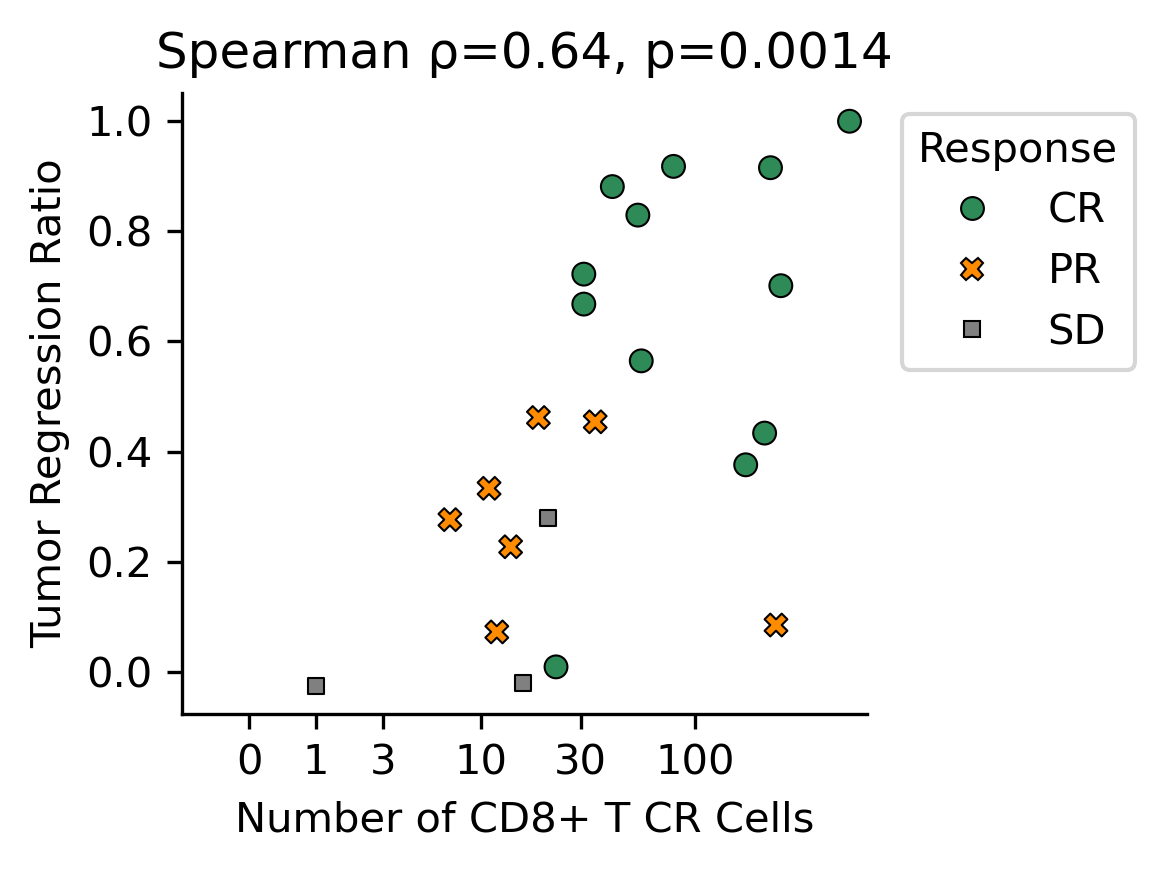

In [22]:
from scipy.stats import spearmanr

palette = {"CR": "seagreen", "PR": "darkorange", "SD": "gray"}

# include x >= 0 (zeros allowed) and finite y
mask = (agg2["n_reactive"] >= 0) & np.isfinite(agg2["Tumor Regression Ratio"]) & np.isfinite(agg2["n_reactive"])
dfp = agg2.loc[mask].copy()

rho, p = spearmanr(dfp["n_reactive"], dfp["Tumor Regression Ratio"])

fig, ax = plt.subplots(figsize=(4, 3))
sns.scatterplot(
    data=dfp, x="n_reactive", y="Tumor Regression Ratio",
    hue="Response", style="Response", palette=palette,
    s=30, edgecolor="k", linewidth=0.5, ax=ax
)

# log10(1 + x) axis transform (works with zeros)
ax.set_xscale("function",
              functions=(lambda x: np.log10(1 + x),
                         lambda x: 10**x - 1))
ax.set_xlim(left=-0.5, right=dfp["n_reactive"].max()*1.2)  # show x=0

# nice ticks in original units
ticks = np.array([0, 1, 3, 10, 30, 100])
ax.set_xticks(ticks)

sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
ax.legend(title="Response", bbox_to_anchor=(1.02, 1), loc="upper left")
ax.set_xlabel("Number of CD8+ T CR Cells")
ax.set_ylabel("Tumor Regression Ratio")
ax.set_title(f"Spearman ρ={rho:.2f}, p={p:.2g}")
plt.tight_layout()
plt.show()



## Now we check time point II

In [23]:
mask = cell_data_CD8["TimePoint"].astype(str).str.upper().eq("II")


agg = (
    cell_data_CD8[mask]
    .groupby("Patient")["cancer_reactive"]
    .agg(n_reactive="sum",      # True→1, False→0, so sum is # of reactive cells
         n_total="count")       # total CD8 cells per patient
)

agg["prop_reactive"] = agg["n_reactive"] / agg["n_total"]

# Pull in the “Response” column from your metadata:
#    (make sure the index of df_meta is exactly the same Patient IDs)
agg = agg.merge(
    df_meta[["Response"]],      # grab only the “Response” column
    how="left",
    left_index=True,
    right_index=True
)

agg



,n_reactive,n_total,prop_reactive,Response
Patient,,,,
P01,29,2048,0.014160,CR
P02,35,2041,0.017148,SD
P03,358,1756,0.203872,PR
P04,28,3130,0.008946,CR
P05,45,1394,0.032281,PR
P08,45,2089,0.021541,CR
P09,0,477,0.000000,CR
P11,1,1285,0.000778,CR
P12,12,739,0.016238,CR


/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_50588/2568212461.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


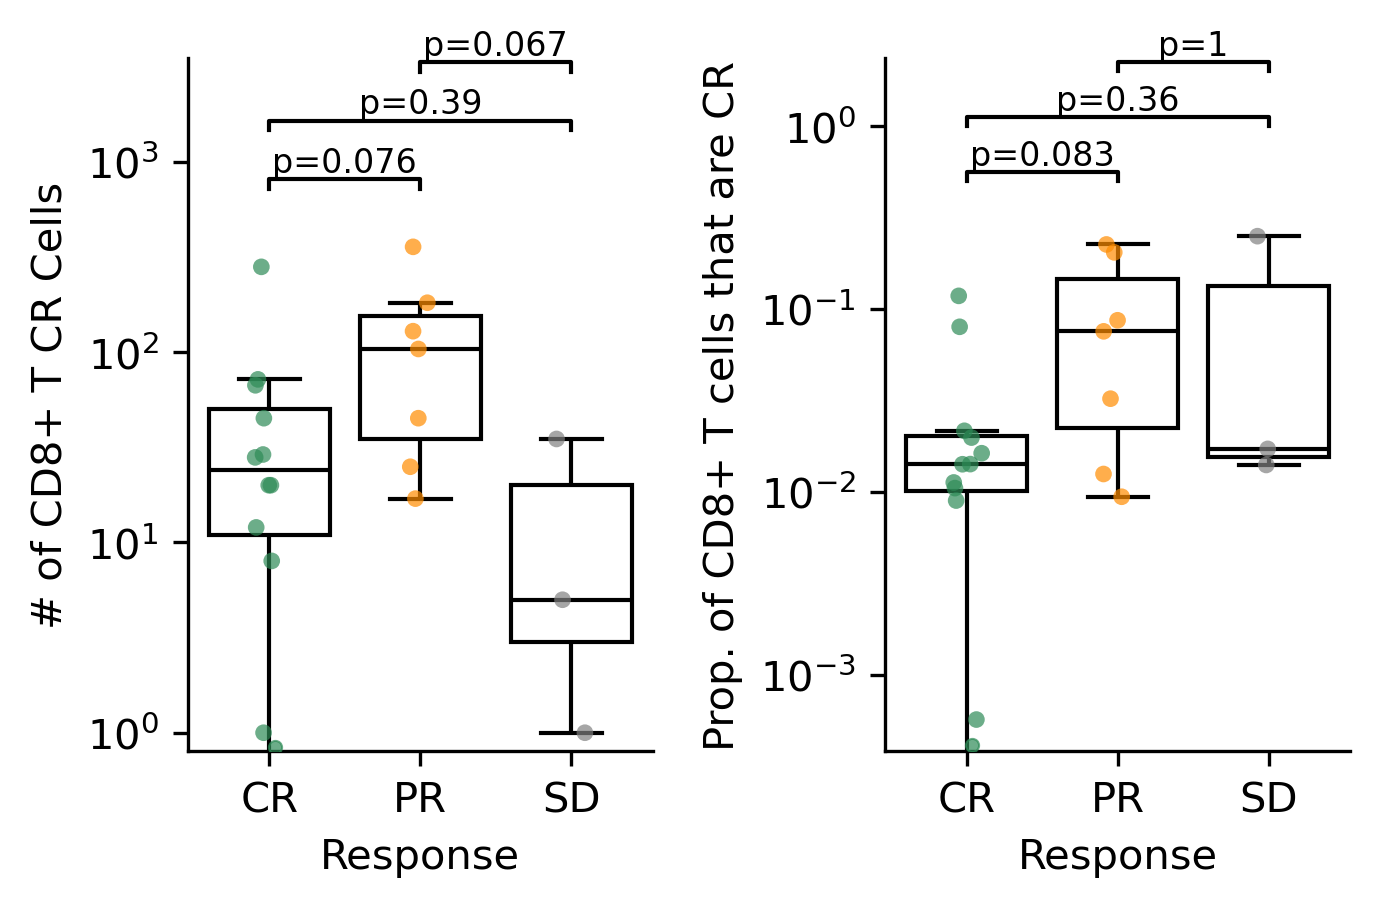

In [24]:
df = agg.reset_index().copy()
resp_order = sorted(df["Response"].unique())

# custom palette
palette = {"CR": "seagreen", "PR": "darkorange", "SD": "gray"}

plt.figure(figsize=(5, 3))
gs = plt.GridSpec(1, 2, wspace=0.5)


# --- (A) counts vs Response (log10 y-axis) ---
ax1 = plt.subplot(gs[0, 0])
sns.boxplot(
    data=df, x="Response", y="n_reactive",
    order=resp_order, showfliers=False,
    hue="Response", palette=["white"] * len(resp_order),
    boxprops=dict(facecolor="white", edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
    legend=False, ax=ax1
)
sns.stripplot(
    data=df, x="Response", y="n_reactive",
    order=resp_order, dodge=False, alpha=0.7, size=4,
    hue="Response", palette=palette, legend=False, ax=ax1
)
if ax1.legend_ is not None:
    ax1.legend_.remove()

# log scale on y; ensure positive lower bound
ax1.set_yscale("symlog", base=10, linthresh=0.5)   # 0–0.5 linear, >0.5 log
pos_counts = df.loc[df["n_reactive"] > 0, "n_reactive"]
if not pos_counts.empty:
    ax1.set_ylim(bottom=pos_counts.min() * 0.8)

ax1.set_xlabel("Response")
ax1.set_ylabel("# of CD8+ T CR Cells")
sns.despine(ax=ax1)

add_pvalues(ax1, df, "n_reactive", group_col="Response",
            order=resp_order, include_zeros_in_test=True,
            draw_brackets=True, text_fmt="p={:.2g}")

overlay_zero_points(ax1, df, "n_reactive", resp_order, palette)

# --- (B) proportion vs Response (log10 y-axis) ---
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(
    data=df, x="Response", y="prop_reactive",
    order=resp_order, showfliers=False,
    hue="Response", palette=["white"] * len(resp_order),
    boxprops=dict(facecolor="white", edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
    legend=False, ax=ax2
)
sns.stripplot(
    data=df, x="Response", y="prop_reactive",
    order=resp_order, dodge=False, alpha=0.7, size=4,
    hue="Response", palette=palette, legend=False, ax=ax2
)
if ax2.legend_ is not None:
    ax2.legend_.remove()

ax2.set_yscale("symlog", base=10, linthresh=1e-3)  # 0–0.001 linear, >0.001 log
pos_prop = df.loc[df["prop_reactive"] > 0, "prop_reactive"]
if not pos_prop.empty:
    ax2.set_ylim(bottom=pos_prop.min() * 0.8)

ax2.set_xlabel("Response")
ax2.set_ylabel("Prop. of CD8+ T cells that are CR")
sns.despine(ax=ax2)

add_pvalues(ax2, df, "prop_reactive", group_col="Response",
            order=resp_order, include_zeros_in_test=True,
            draw_brackets=True, text_fmt="p={:.2g}")
overlay_zero_points(ax2, df, "n_reactive", resp_order, palette)

plt.tight_layout()
plt.show()



In [25]:
## Now we check time point III

In [26]:
mask = cell_data_CD8["TimePoint"].astype(str).str.upper().eq("III")


agg = (
    cell_data_CD8[mask]
    .groupby("Patient")["cancer_reactive"]
    .agg(n_reactive="sum",      # True→1, False→0, so sum is # of reactive cells
         n_total="count")       # total CD8 cells per patient
)

agg["prop_reactive"] = agg["n_reactive"] / agg["n_total"]

# Pull in the “Response” column from your metadata:
#    (make sure the index of df_meta is exactly the same Patient IDs)
agg = agg.merge(
    df_meta[["Response"]],      # grab only the “Response” column
    how="left",
    left_index=True,
    right_index=True
)

agg



,n_reactive,n_total,prop_reactive,Response
Patient,,,,
P01,12,2299,0.005220,CR
P03,827,2909,0.284290,PR
P04,81,4059,0.019956,CR
P08,74,2427,0.030490,CR
P14,250,804,0.310945,PR
P18,117,3408,0.034331,CR
P19,123,1097,0.112124,PR
P20,147,2409,0.061021,CR
P21,40,1938,0.020640,CR


In [27]:
df = agg.reset_index().copy()
df["Response"] = df["Response"].astype("category")

/var/folders/fk/gk1pvdpx7fz79tx26t0rjc7c0000gp/T/ipykernel_50588/3634373100.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


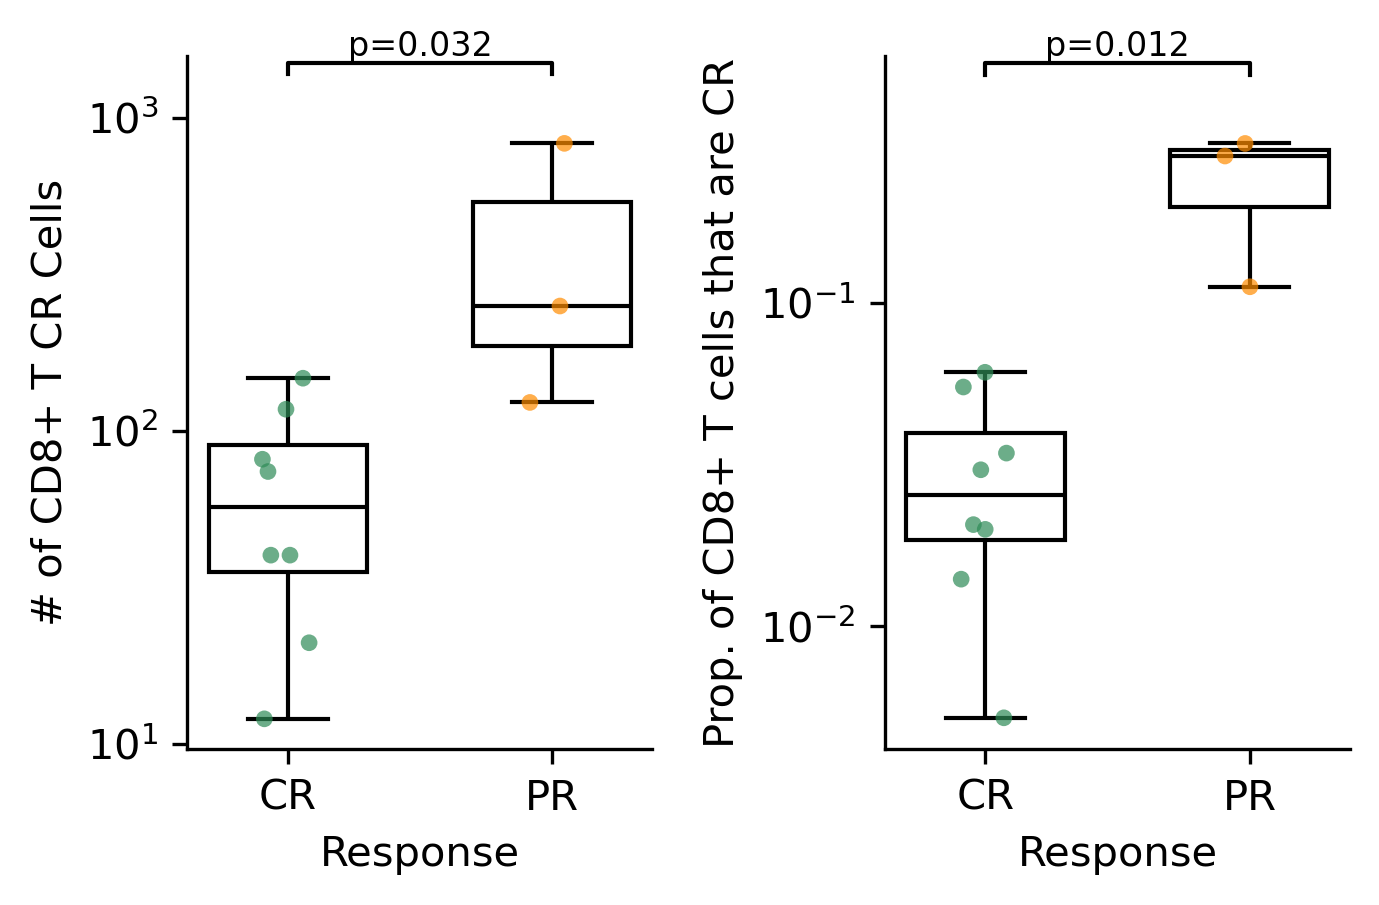

In [28]:
df = agg.reset_index().copy()

palette = {"CR": "seagreen", "PR": "darkorange", "SD": "gray"}

# present levels only (as you had)
desired_order = ["CR", "PR", "SD"]
df["Response"] = df["Response"].astype("category").cat.set_categories(desired_order, ordered=True)
resp_order = [g for g in desired_order if (df["Response"] == g).any()]

plt.figure(figsize=(5, 3))
gs = plt.GridSpec(1, 2, wspace=0.5)

# --- (A) counts vs Response ---
ax1 = plt.subplot(gs[0, 0])

# BOX: no hue -> no dodging; white fill, black outline; narrower width
sns.boxplot(
    data=df, x="Response", y="n_reactive",
    order=resp_order, showfliers=False,
    color="white",                      # <— no palette/hue here
    width=0.6,                          # optional: tidier width
    boxprops=dict(facecolor="white", edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
    ax=ax1, zorder=1
)

# POINTS: keep hue for colors; no dodge so they center on category
sns.stripplot(
    data=df, x="Response", y="n_reactive",
    order=resp_order, hue="Response", hue_order=resp_order,
    palette={k: palette[k] for k in resp_order},
    dodge=False, alpha=0.7, size=4,
    ax=ax1, zorder=2
)
if ax1.legend_ is not None:
    ax1.legend_.remove()

ax1.set_yscale("symlog", base=10, linthresh=0.5)
pos_counts = df.loc[df["n_reactive"] > 0, "n_reactive"]
if not pos_counts.empty:
    ax1.set_ylim(bottom=pos_counts.min() * 0.8)
ax1.set_xlabel("Response"); ax1.set_ylabel("# of CD8+ T CR Cells")
sns.despine(ax=ax1)

add_pvalues(ax1, df, "n_reactive", group_col="Response",
            order=resp_order, include_zeros_in_test=True,
            draw_brackets=True, text_fmt="p={:.2g}")

# --- (B) proportion vs Response ---
ax2 = plt.subplot(gs[0, 1])

sns.boxplot(
    data=df, x="Response", y="prop_reactive",
    order=resp_order, showfliers=False,
    color="white", width=0.6,
    boxprops=dict(facecolor="white", edgecolor="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black"),
    ax=ax2, zorder=1
)
sns.stripplot(
    data=df, x="Response", y="prop_reactive",
    order=resp_order, hue="Response", hue_order=resp_order,
    palette={k: palette[k] for k in resp_order},
    dodge=False, alpha=0.7, size=4,
    ax=ax2, zorder=2
)
if ax2.legend_ is not None:
    ax2.legend_.remove()

ax2.set_yscale("symlog", base=10, linthresh=1e-3)
pos_prop = df.loc[df["prop_reactive"] > 0, "prop_reactive"]
if not pos_prop.empty:
    ax2.set_ylim(bottom=pos_prop.min() * 0.8)
ax2.set_xlabel("Response"); ax2.set_ylabel("Prop. of CD8+ T cells that are CR")
sns.despine(ax=ax2)

add_pvalues(ax2, df, "prop_reactive", group_col="Response",
            order=resp_order, include_zeros_in_test=True,
            draw_brackets=True, text_fmt="p={:.2g}")

plt.tight_layout()
plt.show()
